# Menggabungkan dataset train dan test

## Library

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer


## Load Data

## Menggabungkan dataset train dan test

In [67]:
# Baca data train dan test
train = pd.read_csv("C:/Users/INFINIX/Documents/LOMBA AI TELKOM/code-challenge-penyisihan/code-challenge-preliminary-round/mobility_train.csv")
test = pd.read_csv("C:/Users/INFINIX/Documents/LOMBA AI TELKOM/code-challenge-penyisihan/code-challenge-preliminary-round/mobility_test.csv")
print(f"ini adalah data train : \n{train}")
print(f"ini adalah data test : \n{test}")

ini adalah data train : 
     zone_id        date  trips_thousands
0       Z029  2025-02-24       291.223641
1       Z084  2025-01-27       295.244786
2       Z103  2025-01-31       312.233743
3       Z061  2025-02-26       296.010680
4       Z009  2025-01-17       262.210143
...      ...         ...              ...
9995    Z065  2025-03-02       300.127567
9996    Z103  2025-01-18       321.827019
9997    Z112  2025-01-21       278.950256
9998    Z165  2025-03-30       262.285878
9999    Z099  2025-03-02       360.677016

[10000 rows x 3 columns]
ini adalah data test : 
          ID zone_id        date
0     ID0001    Z056  2025-01-30
1     ID0002    Z065  2025-02-08
2     ID0003    Z042  2025-02-12
3     ID0004    Z076  2025-01-23
4     ID0005    Z109  2025-03-01
...      ...     ...         ...
1995  ID1996    Z118  2025-02-06
1996  ID1997    Z002  2025-02-26
1997  ID1998    Z048  2025-03-10
1998  ID1999    Z198  2025-03-05
1999  ID2000    Z093  2025-03-27

[2000 rows x 3 columns]


## Ambil kolom ID pada test

In [68]:
# Ambil kolom ID untuk format submission
submission_ids = test['ID'].copy()
# Tampilkan beberapa ID yang sudah disimpan untuk verifikasi
print("\nKolom 'ID' berhasil disimpan:")
print(submission_ids.head())
# Hapus kolom 'ID' dari DataFrame 'test' agar tidak ikut di-preprocessing
test = test.drop('ID', axis=1)

# Tampilkan data test setelah kolom 'ID' dihapus
print("\nData test setelah kolom 'ID' dihapus:")
print(test.head())


Kolom 'ID' berhasil disimpan:
0    ID0001
1    ID0002
2    ID0003
3    ID0004
4    ID0005
Name: ID, dtype: object

Data test setelah kolom 'ID' dihapus:
  zone_id        date
0    Z056  2025-01-30
1    Z065  2025-02-08
2    Z042  2025-02-12
3    Z076  2025-01-23
4    Z109  2025-03-01


# Gabungkan train dan test

In [69]:
# Tambahkan kolom 'is_train' untuk menandai mana data training dan testing
train['is_train'] = 1
test['is_train'] = 0

# Gabungkan df_train dan df_test untuk preprocessing konsisten
df_combined = pd.concat([train.drop(columns='ID', errors='ignore'), test.drop(columns='ID', errors='ignore')], ignore_index=True)

# Ubah kolom 'date' menjadi tipe datetime
df_combined['date'] = pd.to_datetime(df_combined['date'])

# Sorting berdasarkan zone_id dan date sangat direkomendasikan
# untuk performa merge dan agar data urut
df_combined = df_combined.sort_values(by=['zone_id', 'date']).reset_index(drop=True)

print("Ukuran df_combined awal:", df_combined.shape)
print(df_combined)

Ukuran df_combined awal: (12000, 4)
      zone_id       date  trips_thousands  is_train
0        Z001 2025-01-01       299.648265         1
1        Z001 2025-01-02              NaN         0
2        Z001 2025-01-04       335.901729         1
3        Z001 2025-01-06       324.615862         1
4        Z001 2025-01-09       341.405381         1
...       ...        ...              ...       ...
11995    Z200 2025-03-21              NaN         0
11996    Z200 2025-03-23       305.454852         1
11997    Z200 2025-03-25       320.139983         1
11998    Z200 2025-03-28       305.108506         1
11999    Z200 2025-03-30       315.751292         1

[12000 rows x 4 columns]


# Demografi

- education_data
- resident_data
- workfave_data

In [70]:
# education_data
education_data = pd.read_csv("C:/Users/INFINIX/Documents/LOMBA AI TELKOM/code-challenge-penyisihan/code-challenge-preliminary-round/Demografi/education_data.csv")
print(f"dataset education: \n{education_data.head(5)}")
# resident_data
resident_data = pd.read_csv("C:/Users/INFINIX/Documents/LOMBA AI TELKOM/code-challenge-penyisihan/code-challenge-preliminary-round/Demografi/resident_data.csv")
print(f"dataset resident: \n{resident_data.head(5)}")
# workface_data
workface_data = pd.read_csv("C:/Users/INFINIX/Documents/LOMBA AI TELKOM/code-challenge-penyisihan/code-challenge-preliminary-round/Demografi/workforce_data.csv")
print(f"dataset workface: \n{workface_data.head(5)}")

dataset education: 
  zone_id  education_level  school_count
0    Z001         3.416287          10.0
1    Z002         4.629521          21.0
2    Z003         1.955427          23.0
3    Z004         2.878567          30.0
4    Z005              NaN          48.0
dataset resident: 
  zone_id  resident_count age_group  employment_rate
0    Z001         76422.0         A         0.655300
1    Z002         35795.0       NaN         0.624262
2    Z003         20860.0         Y         0.728494
3    Z004         58158.0         A         0.806550
4    Z005         74343.0         Y         0.617458
dataset workface: 
  zone_id commute_preference  workforce_size
0    Z001                  B         13906.0
1    Z002                  B         41914.0
2    Z003                  B         49814.0
3    Z004                  B         18076.0
4    Z005                  B         42650.0


## Merge dengan df_combined

digabung dengan df_combined berdasarkan zone id

In [71]:
df_combined = pd.merge(df_combined, education_data, on='zone_id', how='left')
df_combined = pd.merge(df_combined, resident_data, on='zone_id', how='left')
df_combined = pd.merge(df_combined, workface_data, on='zone_id', how='left')

print("Ukuran df_combined setelah gabung demografi:", df_combined.shape)

print(f"tampilan df_combined setelah digabung dengan demografi: \n{df_combined.head(5)}")


Ukuran df_combined setelah gabung demografi: (12000, 11)
tampilan df_combined setelah digabung dengan demografi: 
  zone_id       date  trips_thousands  is_train  education_level  \
0    Z001 2025-01-01       299.648265         1         3.416287   
1    Z001 2025-01-02              NaN         0         3.416287   
2    Z001 2025-01-04       335.901729         1         3.416287   
3    Z001 2025-01-06       324.615862         1         3.416287   
4    Z001 2025-01-09       341.405381         1         3.416287   

   school_count  resident_count age_group  employment_rate commute_preference  \
0          10.0         76422.0         A           0.6553                  B   
1          10.0         76422.0         A           0.6553                  B   
2          10.0         76422.0         A           0.6553                  B   
3          10.0         76422.0         A           0.6553                  B   
4          10.0         76422.0         A           0.6553              

# Cuaca

- air_quality
- weather_condition


In [72]:
# air quality
air_quality = pd.read_csv("C:/Users/INFINIX/Documents/LOMBA AI TELKOM/code-challenge-penyisihan/code-challenge-preliminary-round/Cuaca/air_quality.csv")
print(f"dataset weather condition: \n{air_quality.head(5)}")
# weather conditions
weather_conditions = pd.read_csv("C:/Users/INFINIX/Documents/LOMBA AI TELKOM/code-challenge-penyisihan/code-challenge-preliminary-round/Cuaca/weather_conditions.csv")
print(f"dataset air quality: \n{weather_conditions.head(5)}")

dataset weather condition: 
  zone_id        date  air_quality_index
0    Z001  2025-01-01         125.493411
1    Z001  2025-01-02          74.053805
2    Z001  2025-01-03          83.358247
3    Z001  2025-01-04          27.344752
4    Z001  2025-01-05           9.122634
dataset air quality: 
  zone_id        date  temperature  precipitation
0    Z001  2025-01-01    29.078548       8.309498
1    Z001  2025-01-02    26.074013       3.747331
2    Z001  2025-01-03    27.002622       3.152371
3    Z001  2025-01-04    15.468879       1.295502
4    Z001  2025-01-05          NaN      10.027375


## Merge dengan df_combined

digabung dengan df_combined berdasarkan zone_id dan tanggal.
dikarenakan tanggal masih berupa string atau object, maka harus dilakukan konversi tipe data menjadi datetime.

In [73]:
weather_conditions['date'] = pd.to_datetime(weather_conditions['date'])
df_combined = pd.merge(df_combined, weather_conditions, on=['zone_id', 'date'], how='left')

air_quality['date'] = pd.to_datetime(air_quality['date'])
df_combined = pd.merge(df_combined, air_quality, on=['zone_id', 'date'], how='left')

print("Ukuran df_combined setelah gabung Cuaca:", df_combined.shape)

print(f"tampilan df_combined setelah digabung dengan Cuaca: \n{df_combined.head(5)}")

Ukuran df_combined setelah gabung Cuaca: (12000, 14)
tampilan df_combined setelah digabung dengan Cuaca: 
  zone_id       date  trips_thousands  is_train  education_level  \
0    Z001 2025-01-01       299.648265         1         3.416287   
1    Z001 2025-01-02              NaN         0         3.416287   
2    Z001 2025-01-04       335.901729         1         3.416287   
3    Z001 2025-01-06       324.615862         1         3.416287   
4    Z001 2025-01-09       341.405381         1         3.416287   

   school_count  resident_count age_group  employment_rate commute_preference  \
0          10.0         76422.0         A           0.6553                  B   
1          10.0         76422.0         A           0.6553                  B   
2          10.0         76422.0         A           0.6553                  B   
3          10.0         76422.0         A           0.6553                  B   
4          10.0         76422.0         A           0.6553                  B   

# Aktivitas Urban

- business_activity
- event_Data
- tourism_Data
- traffic_data

In [74]:
# Business activity
business_activity = pd.read_csv("C:/Users/INFINIX/Documents/LOMBA AI TELKOM/code-challenge-penyisihan/code-challenge-preliminary-round/Aktivitas_Urban/business_activity.csv")
print(f"dataset weather business activity: \n{business_activity.head(5)}")
# Event data
event_data = pd.read_csv("C:/Users/INFINIX/Documents/LOMBA AI TELKOM/code-challenge-penyisihan/code-challenge-preliminary-round/Aktivitas_Urban/event_data.csv")
print(f"dataset event data: \n{event_data.head(5)}")
# Tourism data
tourism_data = pd.read_csv("C:/Users/INFINIX/Documents/LOMBA AI TELKOM/code-challenge-penyisihan/code-challenge-preliminary-round/Aktivitas_Urban/tourism_data.csv")
print(f"dataset tourism data: \n{tourism_data.head(5)}")
# Traffic data
traffic_data = pd.read_csv("C:/Users/INFINIX/Documents/LOMBA AI TELKOM/code-challenge-penyisihan/code-challenge-preliminary-round/Aktivitas_Urban/traffic_data.csv")
print(f"dataset traffic data: \n{traffic_data.head(5)}")


dataset weather business activity: 
  zone_id        date  business_density  retail_count
0    Z001  2025-01-01        116.975697          95.0
1    Z001  2025-01-02        212.176314          83.0
2    Z001  2025-01-03        383.334575         176.0
3    Z001  2025-01-04        292.520319          46.0
4    Z001  2025-01-05        301.443745         153.0
dataset event data: 
  zone_id        date  event_count event_type
0    Z001  2025-01-01          7.0          N
1    Z001  2025-01-02          1.0          N
2    Z001  2025-01-03          9.0          N
3    Z001  2025-01-04          0.0        NaN
4    Z001  2025-01-05          4.0          N
dataset tourism data: 
  zone_id        date  tourist_visits
0    Z001  2025-01-01           354.0
1    Z001  2025-01-02           473.0
2    Z001  2025-01-03           350.0
3    Z001  2025-01-04           228.0
4    Z001  2025-01-05           251.0
dataset traffic data: 
  zone_id        date traffic_congestion
0    Z001  2025-01-01       

## Merge dengan df_combined

Digabung berdasarkan zone_id dan date, serta dilakukan konversi tipe data date dari string atau object menjadi datetime.

In [75]:
business_activity['date'] = pd.to_datetime(business_activity['date'])
df_combined = pd.merge(df_combined, business_activity, on=['zone_id', 'date'], how='left')

event_data['date'] = pd.to_datetime(event_data['date'])
df_combined = pd.merge(df_combined, event_data, on=['zone_id', 'date'], how='left')

tourism_data['date'] = pd.to_datetime(tourism_data['date'])
df_combined = pd.merge(df_combined, tourism_data, on=['zone_id', 'date'], how='left')

traffic_data['date'] = pd.to_datetime(traffic_data['date'])
df_combined = pd.merge(df_combined, traffic_data, on=['zone_id', 'date'], how='left')

print("Ukuran df_combined setelah gabung Aktivitas Urban:", df_combined.shape)

print(f"tampilan df_combined setelah digabung dengan Aktivitas Urban: \n{df_combined.head(5)}")

Ukuran df_combined setelah gabung Aktivitas Urban: (12000, 20)
tampilan df_combined setelah digabung dengan Aktivitas Urban: 
  zone_id       date  trips_thousands  is_train  education_level  \
0    Z001 2025-01-01       299.648265         1         3.416287   
1    Z001 2025-01-02              NaN         0         3.416287   
2    Z001 2025-01-04       335.901729         1         3.416287   
3    Z001 2025-01-06       324.615862         1         3.416287   
4    Z001 2025-01-09       341.405381         1         3.416287   

   school_count  resident_count age_group  employment_rate commute_preference  \
0          10.0         76422.0         A           0.6553                  B   
1          10.0         76422.0         A           0.6553                  B   
2          10.0         76422.0         A           0.6553                  B   
3          10.0         76422.0         A           0.6553                  B   
4          10.0         76422.0         A           0.6553  

# Infrastruktur Transportasi

- bike_sharing
- parking_data
- road_network
- transit_stations

In [76]:
# Bike sharing
bike_sharing = pd.read_csv("C:/Users/INFINIX/Documents/LOMBA AI TELKOM/code-challenge-penyisihan/code-challenge-preliminary-round/Infrastruktur_Transportasi/bike_sharing.csv")
print(f"dataset bike sharing: \n{bike_sharing.head(5)}")
# Parking data
parking_data = pd.read_csv("C:/Users/INFINIX/Documents/LOMBA AI TELKOM/code-challenge-penyisihan/code-challenge-preliminary-round/Infrastruktur_Transportasi/parking_data.csv")
print(f"dataset parking data: \n{parking_data.head(5)}")
# road network
road_network = pd.read_csv("C:/Users/INFINIX/Documents/LOMBA AI TELKOM/code-challenge-penyisihan/code-challenge-preliminary-round/Infrastruktur_Transportasi/road_network.csv")
print(f"dataset road network: \n{road_network.head(5)}")
# Transit stations
transit_stations = pd.read_csv("C:/Users/INFINIX/Documents/LOMBA AI TELKOM/code-challenge-penyisihan/code-challenge-preliminary-round/Infrastruktur_Transportasi/transit_stations.csv")
print(f"dataset transit stations: \n{transit_stations.head(5)}")


dataset bike sharing: 
  zone_id        date  bike_availability
0    Z001  2025-01-01              120.0
1    Z001  2025-01-02                NaN
2    Z001  2025-01-03              171.0
3    Z001  2025-01-04              158.0
4    Z001  2025-01-05              196.0
dataset parking data: 
  zone_id        date  parking_capacity
0    Z001  2025-01-01             839.0
1    Z001  2025-01-02             351.0
2    Z001  2025-01-03             515.0
3    Z001  2025-01-04             372.0
4    Z001  2025-01-05             940.0
dataset road network: 
  zone_id  road_density
0    Z001     51.819393
1    Z002     64.765366
2    Z003     61.109165
3    Z004     33.634164
4    Z005     20.551732
dataset transit stations: 
  zone_id  station_count transit_type
0    Z001           11.0            M
1    Z002           10.0            B
2    Z003            9.0            B
3    Z004           11.0          NaN
4    Z005            7.0            M


# Melakukan merge pada df_combined

In [77]:
df_combined = pd.merge(df_combined, transit_stations, on='zone_id', how='left')

df_combined = pd.merge(df_combined, road_network, on='zone_id', how='left')

bike_sharing['date'] = pd.to_datetime(bike_sharing['date'])
df_combined = pd.merge(df_combined, bike_sharing, on=['zone_id', 'date'], how='left')

parking_data['date'] = pd.to_datetime(parking_data['date'])
df_combined = pd.merge(df_combined, parking_data, on=['zone_id', 'date'], how='left')

print("Ukuran df_combined setelah gabung Infrastruktur transportasi:", df_combined.shape)

print(f"tampilan df_combined setelah digabung dengan Infrastruktur transportasi: \n{df_combined.head(5)}")

Ukuran df_combined setelah gabung Infrastruktur transportasi: (12000, 25)
tampilan df_combined setelah digabung dengan Infrastruktur transportasi: 
  zone_id       date  trips_thousands  is_train  education_level  \
0    Z001 2025-01-01       299.648265         1         3.416287   
1    Z001 2025-01-02              NaN         0         3.416287   
2    Z001 2025-01-04       335.901729         1         3.416287   
3    Z001 2025-01-06       324.615862         1         3.416287   
4    Z001 2025-01-09       341.405381         1         3.416287   

   school_count  resident_count age_group  employment_rate commute_preference  \
0          10.0         76422.0         A           0.6553                  B   
1          10.0         76422.0         A           0.6553                  B   
2          10.0         76422.0         A           0.6553                  B   
3          10.0         76422.0         A           0.6553                  B   
4          10.0         76422.0       

In [78]:
print("Kolom-kolom di df_combined:", df_combined.columns.tolist())


Kolom-kolom di df_combined: ['zone_id', 'date', 'trips_thousands', 'is_train', 'education_level', 'school_count', 'resident_count', 'age_group', 'employment_rate', 'commute_preference', 'workforce_size', 'temperature', 'precipitation', 'air_quality_index', 'business_density', 'retail_count', 'event_count', 'event_type', 'tourist_visits', 'traffic_congestion', 'station_count', 'transit_type', 'road_density', 'bike_availability', 'parking_capacity']


# EDA (Exploratory Data Analysis)

Pada dataset besar (gabungan) ini perlu dilakukan EDA, yaitu tahap untuk mengeksplorasi data, memahami data, hingga melihat penyebaran data.

## Melihat informasi ringkas mengenai dataset

In [79]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   zone_id             12000 non-null  object        
 1   date                12000 non-null  datetime64[ns]
 2   trips_thousands     10000 non-null  float64       
 3   is_train            12000 non-null  int64         
 4   education_level     11023 non-null  float64       
 5   school_count        10851 non-null  float64       
 6   resident_count      11006 non-null  float64       
 7   age_group           10911 non-null  object        
 8   employment_rate     11399 non-null  float64       
 9   commute_preference  11089 non-null  object        
 10  workforce_size      10952 non-null  float64       
 11  temperature         11161 non-null  float64       
 12  precipitation       11159 non-null  float64       
 13  air_quality_index   11127 non-null  float64   

Informasi yang saya dapat dari informasi ringkas mengenai dataset gabungan tersebut adalah:
- Jumlah baris dari dataset ini sebanyak 12.000 dan 25 kolom.
- zone_id berjumlah utuh tidak ada missing values.
- date sudah berhasil dilakukan konversi tipe data menjadi datetime dan berjumlah utuh.
- trips_thousands berjumlah 10.000 (data target), berarti 2.000 missing values ini normal, karena 2.000 baris ini adalah data test yang nilai trips_thousands-nya harus diprediksi
- is_train yaitu label dari pembeda antara data train dan test, yang berjumlah utuh dan akan digunakan untuk memisahkan data kembali.
- terdapat beberapa kolom numerik yang missing values, yang terlihat jelas dari selisih antara total data dan output dari total data tiap kolom.
- begitu juga dengan kolom kategorikal terdapat beberapa yang memiliki missing values.
Dari output tersebut dapat disimpan informasi untuk melakukan penanganan missing values pada analisis selanjutnya.

In [80]:
df_combined.describe()

date  trips_thousands      is_train  \
count                       12000     10000.000000  12000.000000   
mean   2025-02-14 10:52:26.400000       301.826844      0.833333   
min           2025-01-01 00:00:00       200.000000      0.000000   
25%           2025-01-23 00:00:00       281.191095      1.000000   
50%           2025-02-14 12:00:00       301.164083      1.000000   
75%           2025-03-09 00:00:00       322.046527      1.000000   
max           2025-03-31 00:00:00       397.143774      1.000000   
std                           NaN        29.320680      0.372694   

       education_level  school_count  resident_count  employment_rate  \
count     11023.000000  10851.000000    11006.000000     11399.000000   
mean          3.027083     25.925168    50109.684627         0.751090   
min           1.008415      5.000000    20161.000000         0.604591   
25%           2.111288     15.000000    32185.000000         0.676105   
50%           3.068958     26.000000    48693.000000         0.748968   
75%           3.999403     36.000000    67716.000000         0.821130   
max           4.998855     49.000000    79900.000000         0.898779   
std           1.116434     12.636788    18940.142115         0.086388   

       workforce_size   temperature  precipitation  air_quality_index  \
count    10952.000000  11161.000000   11159.000000       11127.000000   
mean     28381.343134     22.552812       4.993737          75.064537   
min       5145.000000     15.000313       0.000752           0.001708   
25%      16421.000000     18.758205       1.422305          37.676871   
50%      28711.000000     22.638648       3.447124          75.484096   
75%      39084.000000     26.313687       6.918243         112.346314   
max      49976.000000     29.999364      30.000000         149.999627   
std      12709.840166      4.331341       4.948088          43.278275   

       business_density  retail_count   event_count  tourist_visits  \
count      11186.000000  11158.000000  11132.000000    11188.000000   
mean         250.194254    109.517835      4.521380      492.641133   
min          100.009216     20.000000      0.000000        0.000000   
25%          175.652546     64.000000      2.000000      243.000000   
50%          249.451003    110.000000      5.000000      486.000000   
75%          324.984499    154.000000      7.000000      743.000000   
max          399.961431    199.000000      9.000000      999.000000   
std           86.494601     51.816122      2.870328      289.221408   

       station_count  road_density  bike_availability  parking_capacity  
count   11048.000000  11406.000000       11161.000000      11151.000000  
mean        9.722303     54.326856          99.167548        548.546498  
min         5.000000     11.358978           0.000000        100.000000  
25%         7.000000     30.409925          49.000000        328.000000  
50%        10.000000     55.779416         100.000000        551.000000  
75%        12.000000     74.577042         149.000000        769.500000  
max        14.000000     99.211172         199.000000        999.000000  
std         2.703273     24.467624          57.977652        258.641269

## Hitung jumlah missing values

In [81]:
missing_counts = df_combined.isnull().sum()
print(f"jumlah missing values: \n{missing_counts}")
# presentase missing values
missing_percentages = (df_combined.isnull().sum() / len(df_combined)) * 100
print(f"presentase missing values: \n{missing_percentages}")

jumlah missing values: 
zone_id                  0
date                     0
trips_thousands       2000
is_train                 0
education_level        977
school_count          1149
resident_count         994
age_group             1089
employment_rate        601
commute_preference     911
workforce_size        1048
temperature            839
precipitation          841
air_quality_index      873
business_density       814
retail_count           842
event_count            868
event_type             834
tourist_visits         812
traffic_congestion     895
station_count          952
transit_type           767
road_density           594
bike_availability      839
parking_capacity       849
dtype: int64
presentase missing values: 
zone_id                0.000000
date                   0.000000
trips_thousands       16.666667
is_train               0.000000
education_level        8.141667
school_count           9.575000
resident_count         8.283333
age_group              9.075000
empl

In [82]:
# Buat DataFrame untuk visualisasi
missing_info = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentages
})

# Urutkan dari yang paling banyak missing values
missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)
print(missing_info)

                    Missing Count  Missing Percentage
trips_thousands              2000           16.666667
school_count                 1149            9.575000
age_group                    1089            9.075000
workforce_size               1048            8.733333
resident_count                994            8.283333
education_level               977            8.141667
station_count                 952            7.933333
commute_preference            911            7.591667
traffic_congestion            895            7.458333
air_quality_index             873            7.275000
event_count                   868            7.233333
parking_capacity              849            7.075000
retail_count                  842            7.016667
precipitation                 841            7.008333
temperature                   839            6.991667
bike_availability             839            6.991667
event_type                    834            6.950000
business_density            

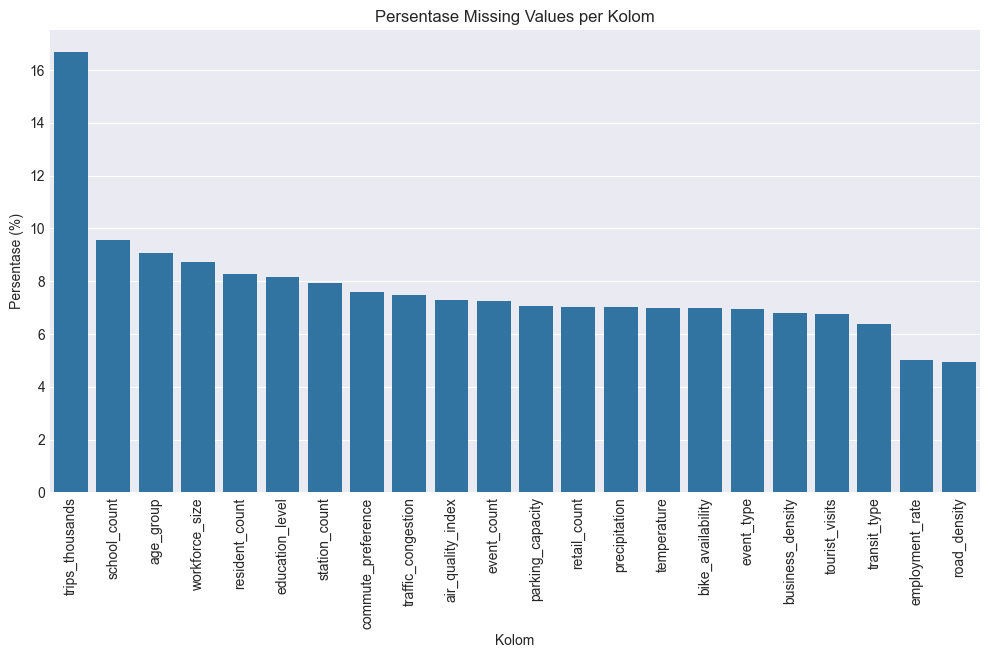

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_info.index, y=missing_info['Missing Percentage'])
plt.xticks(rotation=90)
plt.title('Persentase Missing Values per Kolom')
plt.ylabel('Persentase (%)')
plt.xlabel('Kolom')
plt.show()

## Analisis Distribusi Variabel Numerik

untuk memahami sebaran nilai pada setiap kolom numerik 


Kolom numerik yang akan divisualisasikan: ['education_level', 'school_count', 'resident_count', 'employment_rate', 'workforce_size', 'temperature', 'precipitation', 'air_quality_index', 'business_density', 'retail_count', 'event_count', 'tourist_visits', 'station_count', 'road_density', 'bike_availability', 'parking_capacity']


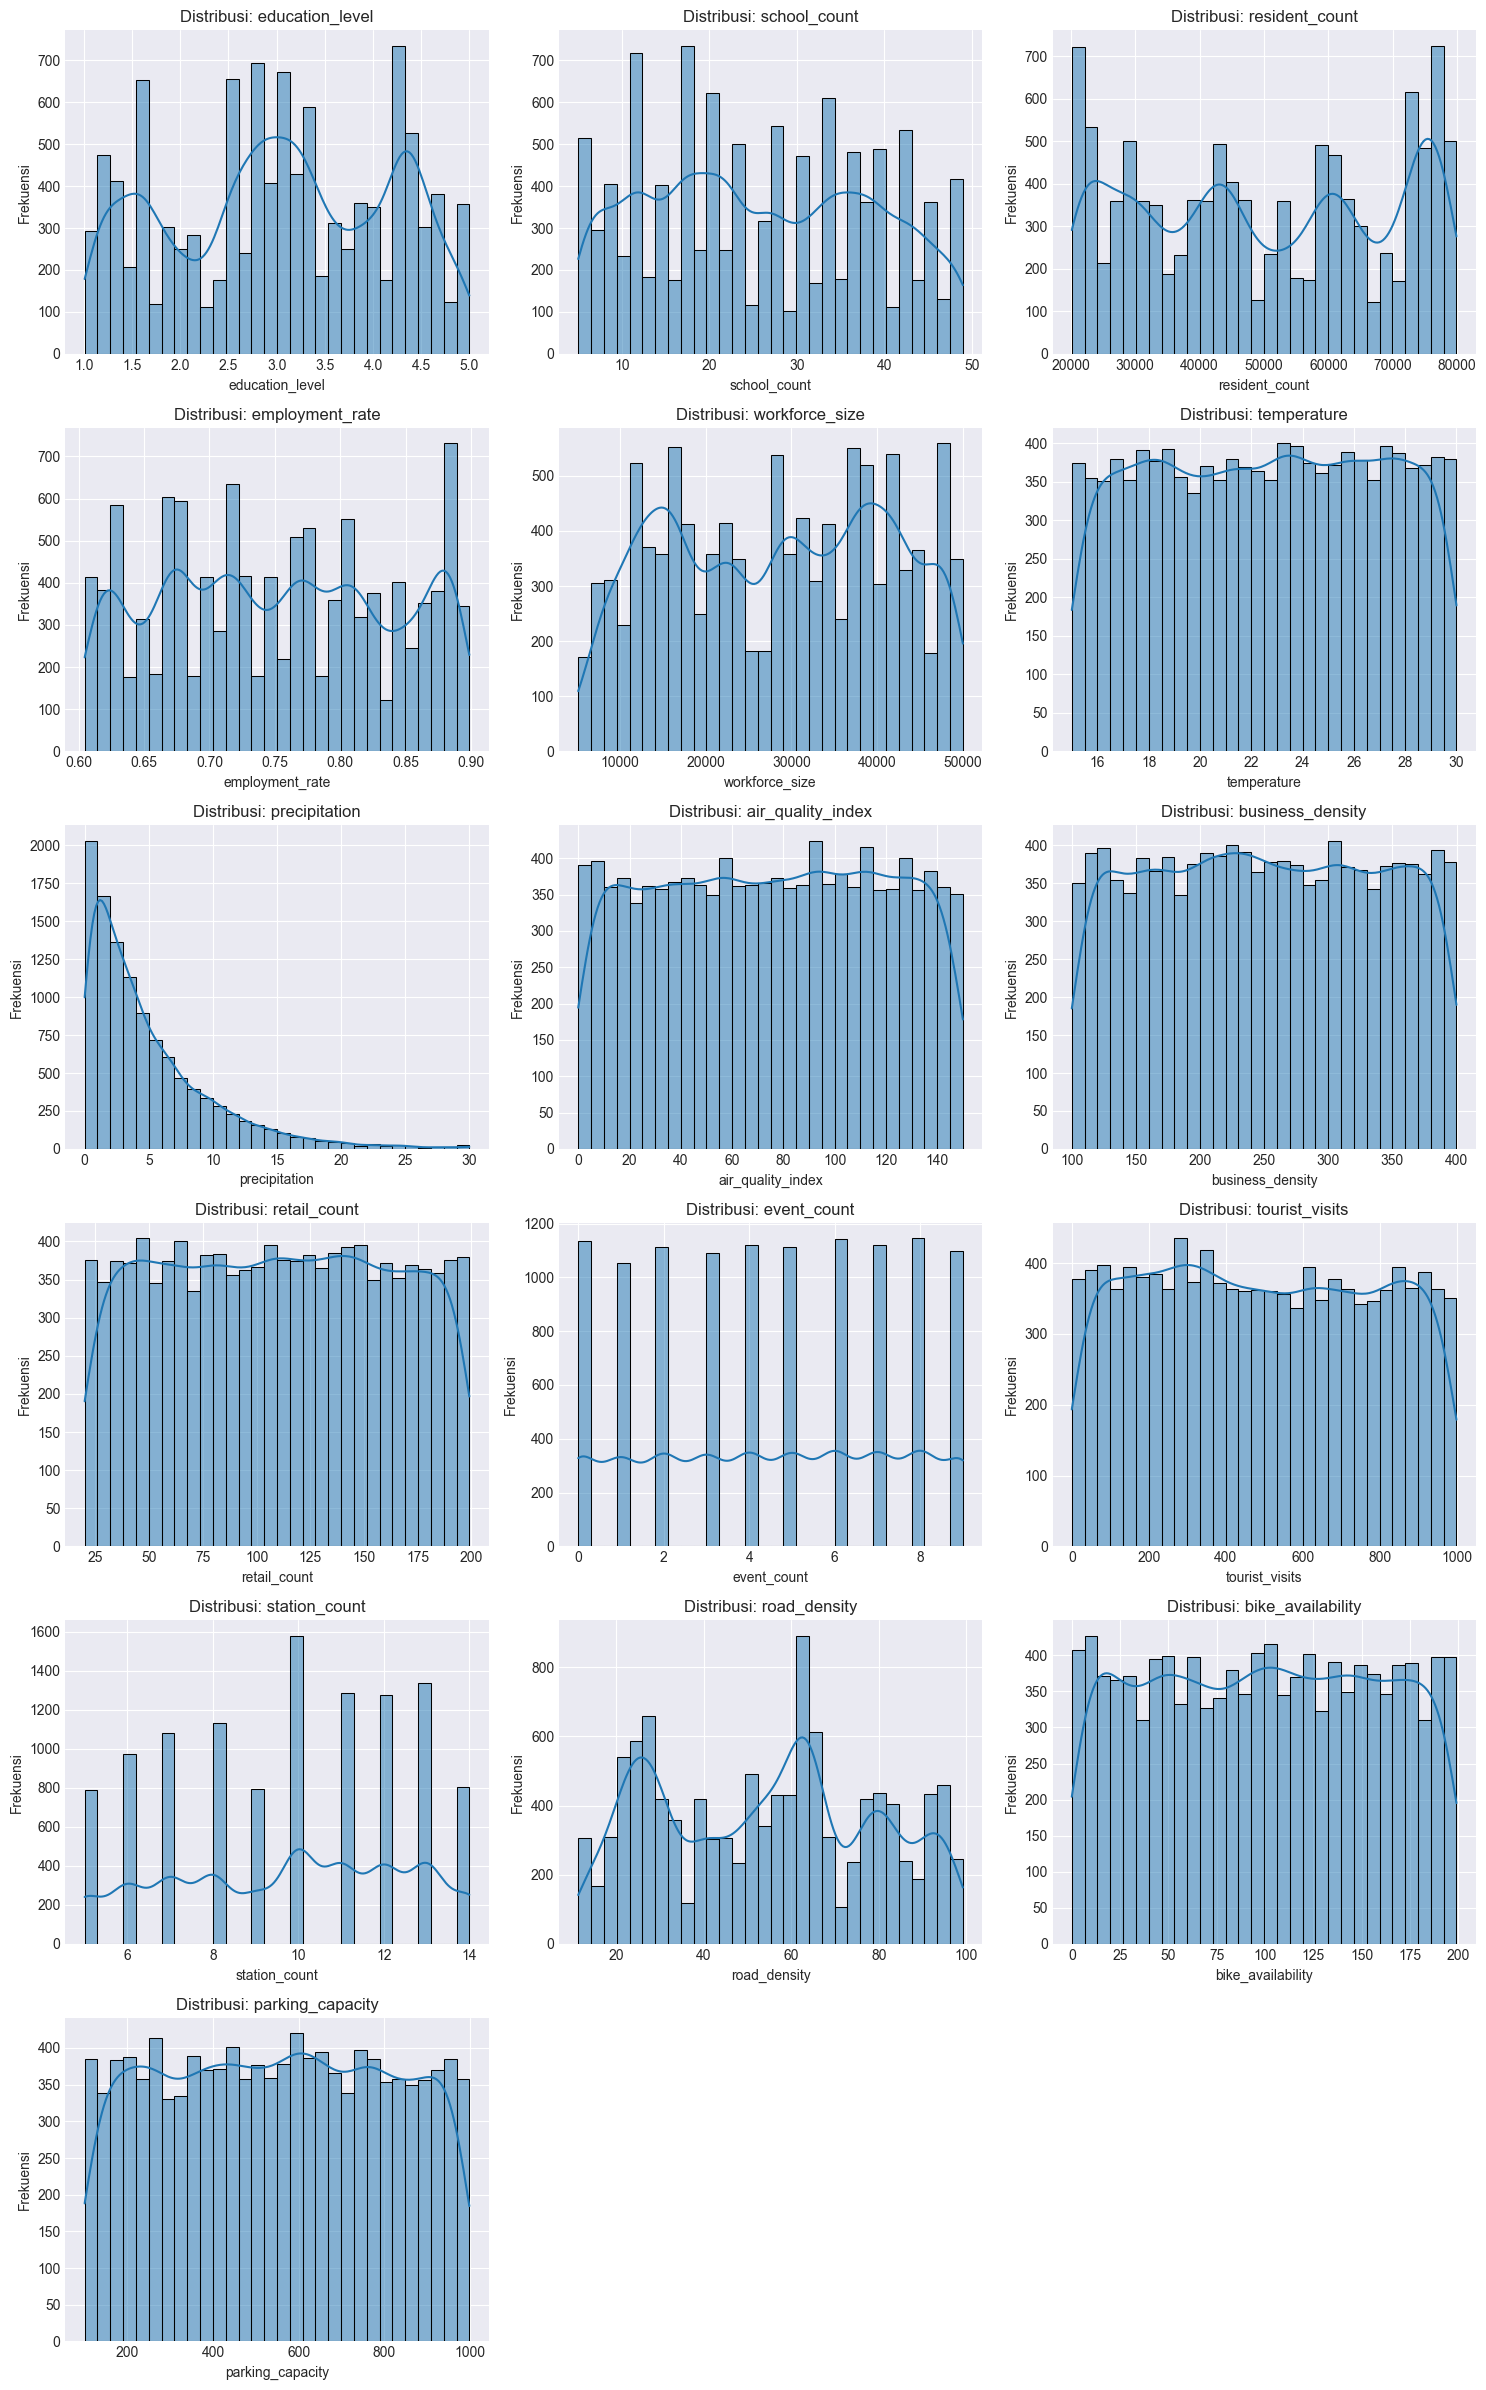

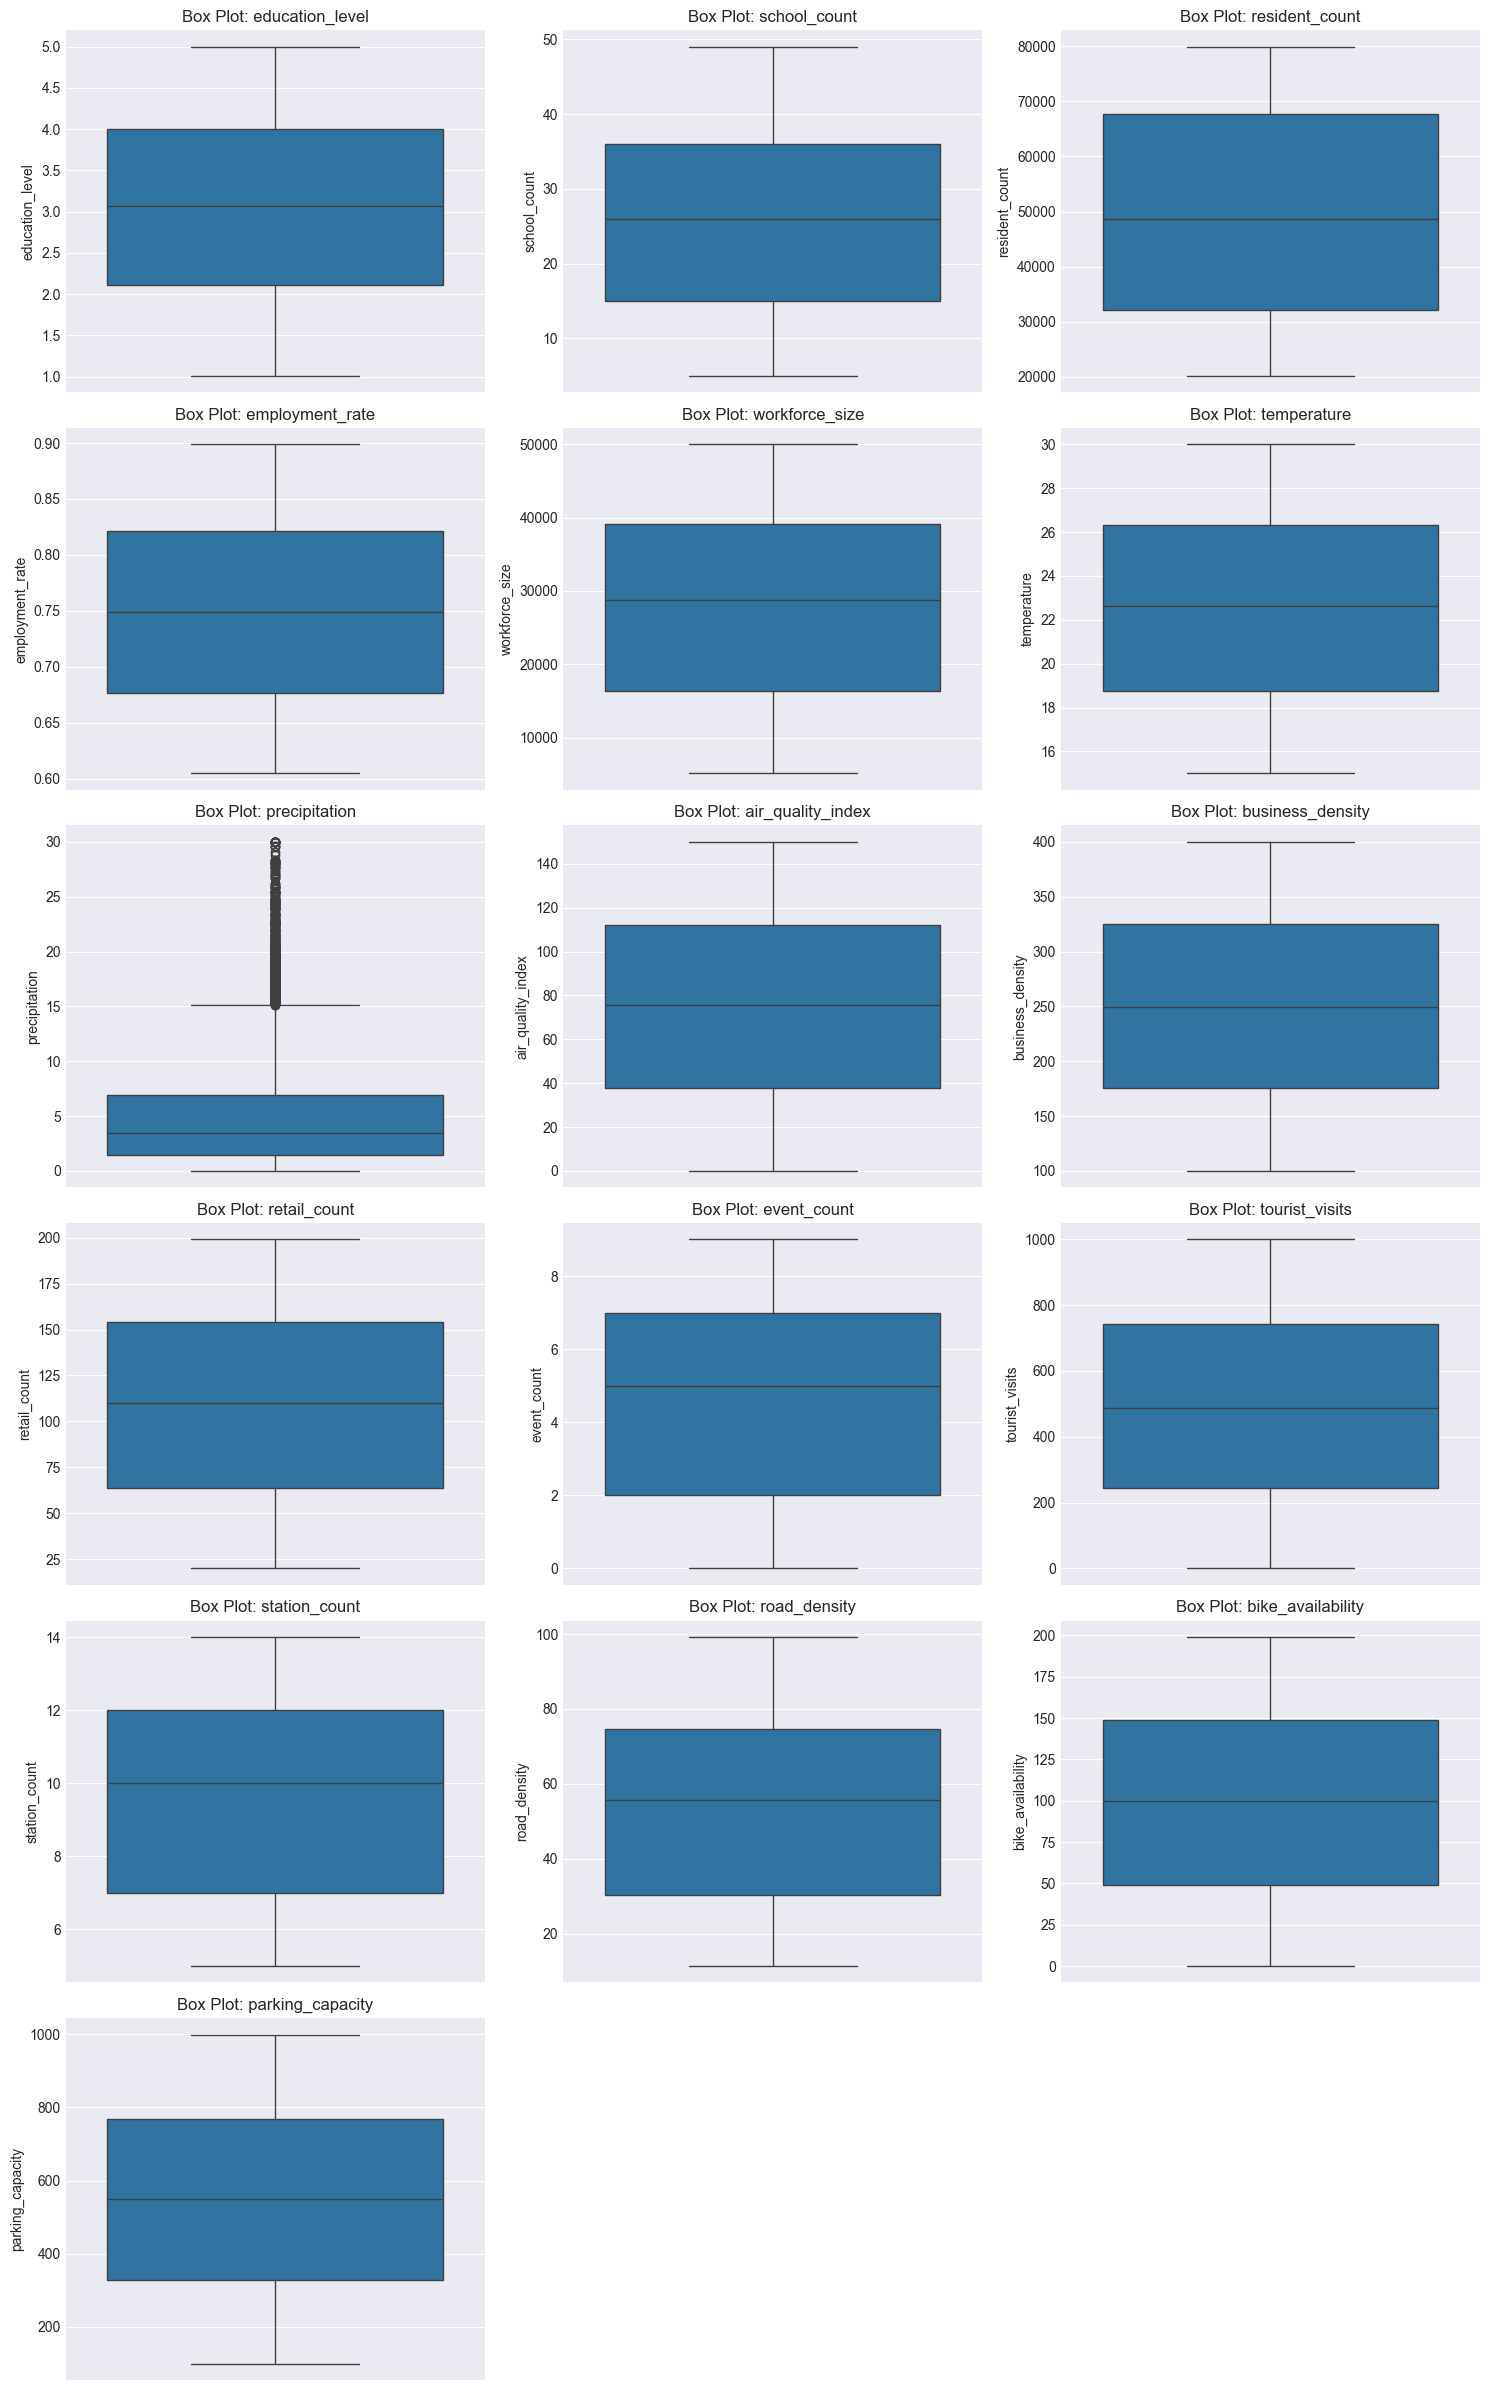


Visualisasi distribusi variabel numerik selesai.


In [84]:
# Identifikasi Kolom Numerik
# Kita hanya ingin memvisualisasikan fitur, bukan 'trips_thousands' (target) atau 'is_train' (penanda)
numeric_features = df_combined.select_dtypes(include=np.number).columns.tolist()

# Hapus kolom target dan penanda dari daftar fitur numerik
if 'trips_thousands' in numeric_features:
    numeric_features.remove('trips_thousands')
if 'is_train' in numeric_features:
    numeric_features.remove('is_train')

print(f"\nKolom numerik yang akan divisualisasikan: {numeric_features}")

# Atur Ukuran Plot
# membuat beberapa plot, jadi hitung berapa baris dan kolom subplot yang dibutuhkan
num_plots = len(numeric_features)
num_cols = 3 # menampilkan 3 plot perbaris
num_rows = (num_plots + num_cols - 1) // num_cols # Hitung jumlah baris yang dibutuhkan

plt.figure(figsize=(num_cols * 5, num_rows * 4)) # Ukuran figure keseluruhan

# Loop Melalui Setiap Kolom Numerik untuk Visualisasi
for i, col in enumerate(numeric_features):
    # Buat Subplot untuk Histogram/KDE
    plt.subplot(num_rows, num_cols, i + 1) # (baris, kolom, indeks plot)
    
    # Histogram: menunjukkan frekuensi nilai dalam rentang tertentu
    # kde=True: menambahkan Kurva Estimasi Kepadatan (garis halus yang menunjukkan bentuk distribusi)
    # dropna(): penting agar plot tidak error jika ada NaN
    sns.histplot(df_combined[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribusi: {col}') # Judul plot
    plt.xlabel(col) # Label sumbu X
    plt.ylabel('Frekuensi') # Label sumbu Y

plt.tight_layout() # Merapikan layout plot agar tidak tumpang tindih
plt.show() # Tampilkan plot

# Tambahan: Visualisasi Outlier dengan Box Plot
# Box Plot sangat efektif untuk melihat sebaran data dan outlier
plt.figure(figsize=(num_cols * 5, num_rows * 4)) # Ukuran figure keseluruhan (bisa disesuaikan)

for i, col in enumerate(numeric_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df_combined[col].dropna()) # Box plot pada sumbu Y
    plt.title(f'Box Plot: {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

print("\nVisualisasi distribusi variabel numerik selesai.")

Dari visualisasi tersebut didapat:
1. Kelompok Demografi & Pekerjaan (Tingkat Pndidikan)
- education_level = Menunjukkan tingkat pendidikan tidak tersebar merata, terdapat beberapa puncak yang menonjol. Yang mungkin menunjukkan bahwa tingkat pendidian tiap-tiap zona mungkin didominasi oleh kelompok tingkat tertentu. Tingkat pendidikan ini dapat memengaruhi kebiasaan mobilitas (misal, orang berpendidikan tinggi mungkin punya pekerjaan yang membutuhkan perjalanan lebih jauh atau ke pusat kota.)
- school_count = Dalam hal jumlah sekolah juga menunjukkan beberapa puncak yang menonjol, mengindikasikan bahwa zona-zona di kota tidak memiliki jumlah sekolah yang sama. Jumlah sekolah akan sangat memengaruhi mobilitas pada jam-jam sibuk sekolah.
- resident_count = Pada distribusi ini menunjukkan bahwa zona-zona di kota memiliki pola kepadatan penduduk yang bervariasi. Ada zona yang padat penduduknya, ada yang sedang, dan ada yang kurang padat. Jumlah penduduk jelas merupakan faktor utama mobilitas. Zona dengan penduduk lebih banyak cenderung memiliki jumlah perjalanan yang lebih tinggi.
- Employment_rate = Terdapat beberapa puncak yang menonjol, menunjukkan beberapa tingkat pekerjaan yang umum. Kelompok zona dengan tingkat pekerjaan yang berbeda-beda, memungkinkan zona industri punya tingkat pekerjaan yang tinggi, sementara zona perumahan mungkin bervariasi. Tingkat pekerjaan secara langsung memengaruhi perjalanan komuter harian.
- workforce_size = Mirip dengan resident_count dan school_count, dengan bergelombang di beberapa puncak. Ini mencerminkan variasi ukuran tenaga kerja di berbagai zona, yang bisa menjadi cerminan jenis-jenis zona yang berbeda. Ukuran tenaga kerja di suatu zona akan memengaruhi jumlah perjalanan masuk dan keluar dari zona tersebut untuk keperluan kerja.
2. Kelompok Cuaca (Dampak lingkugan terhadap perjalanan)
- temperature = Distribusi ini terlihat cukup simetris, mirip bentuk lonceng (relatif normal) untuk suhu di suatu daerah. Mayoritas hari akan berada di suhu rata-rata, dengan beberapa hari lebih dingin atau lebih panas. Suhu yang nyaman akan mendorong lebih banyak perjalanan.
- precipitation = Grafik yang miring ke kanan, dengan puncak yang sangat tinggi berada di dekat 0, yang berarti sebagian besar data memiliki curah hujan sangat rendah atau tidak sama sekali. Namun, ada beberapa batang kecil di sisi kanan yang menunjukkan curah hujan yang lebih tinggi, tetapi ini jarang terjadi. Curah hujan yang tinggi sangat memengaruhi mobilitas, terutama untuk kendaraan  seperti sepeda motor.
- air_quality_index = Distribusi yang terlihat cukup merata di sebagian besar rentang, tanpa puncak yang terlihat sangat dominan. Ini menunjukkan bahwa kualitas udara cukup bervariasi di berbagai hari atau zona, tanpa ada satu nilai yang sangat sering muncul. Kualitas udara yang baik akan membuat orang merasa nyaman untuk berpergian, dan sebaliknya.
3. Kelompok Aktivitas Urban (Penyebab Tarik-Menarik Perjalanan)
- business_density = cenderung merata atau sedikit bergelombang di berbagai rentang. Ini menunjukkan bahwa terdapat zona-zona dengan kepadatan bisnis yang rendah, sedang, hingga tinggi, tanpa satu kategori yang mendominasi secara ekstrem. Zona dengan kepadatan bisnis tinggi akan menarik lebih banyak perjalanan, baik untuk karyawan maupun pelanggan.
- retail_count = Mirip dengan business_density, distribusinya cenderung merata atau sedikit bergelombang. Hal ini mencerminkan keberagaman zona, dari area perumahan murni hingga pusat perjalanan. Zona dengan banyak toko ritel akan menarik perjalanan untuk tujuan belanja.
- event_count = Grafik ini sangat miring ke kanan, dimana sebagian besar data menunjukkan event_count yang sangat rendah mendekati 0-2, dan sangat jarang ada zona/hari dengan banyak acara. Acara besar yang melibatkan banyak orang tidak terjadi setiap hari pada setiap zona, sama seperti curah hujan. Nilai tinggi di kanan akan sangat informatif dan kemungkinan besar meningkatkan mobilitas secara signifikan.
- tourist_visits = mirip dengan event_count, sangat miring ke kanan. sebagian besar zona/hari tidak menerima kunjungan turis, atau sangat sedikit. Namun ada beberapa kasus ekstrem dengan kunjungan turis yang sangat tinggi. Lonjakan kunjungan turis akan menyebabkan peningkatan mobilitas yang signifikan di zona-zona tertentu.
4. Kelompok Infrastruktur Transportasi (Kemudahan dan Ketersediaan Perjalanan)
- station_count = Menunjukkan beberapa puncak diskrit, artinya ada beberapa jumlah stasiun transit yang umum di antara zona-zona. Misalnya, banyak zona mungkin tidak memiliki stasiun. Semakin banyak stasiun transit, maka semakin mudah akses ke transportasi umum, yang bisa meningkatkan perjalanan menggunakan transportasi publik.
- road_density = Distribusi ini tampak cukup merata atau sedikit simetris, dengan rentang yang cukup luas. Ini menunjukkan variasi kepadatan jaringan jalan antar zona, dari daerah yang jarang jalan hingga yang padat. Kepadatan jalan yang lebih tinggi mungkin berarti lebih banyak rute dan konektivitas, yang bisa memfasilitasi mobilitas.
- bike_availability = Distribusi yang cukup simetris atau sedikit miring, dengan beberapa puncak di rentang tertentu, hal ini menunjukkan variasi ketersediaan sepeda di berbagai zona. Ketersediaan sepeda akan memengaruhi penggunaan sepeda sebagai media transportasi.
- parking_capacity = Distribusi ini terlihat simetris, yang menunjukkan variasi kapasitas parkir yang tersedia di berbagai zona. Kapasitas parkir yang cukup akan memengaruhi perjalanan menggunakan kendaraan pribadi.

## Analisis Distribusi Variabel Kategorikal


Kolom kategorikal yang akan divisualisasikan: ['age_group', 'commute_preference', 'event_type', 'traffic_congestion', 'transit_type']


C:\Users\INFINIX\AppData\Local\Temp\ipykernel_2696\3558468860.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_combined[col], order=df_combined[col].value_counts(dropna=False).index, palette='viridis')
C:\Users\INFINIX\AppData\Local\Temp\ipykernel_2696\3558468860.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_combined[col], order=df_combined[col].value_counts(dropna=False).index, palette='viridis')
C:\Users\INFINIX\AppData\Local\Temp\ipykernel_2696\3558468860.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df

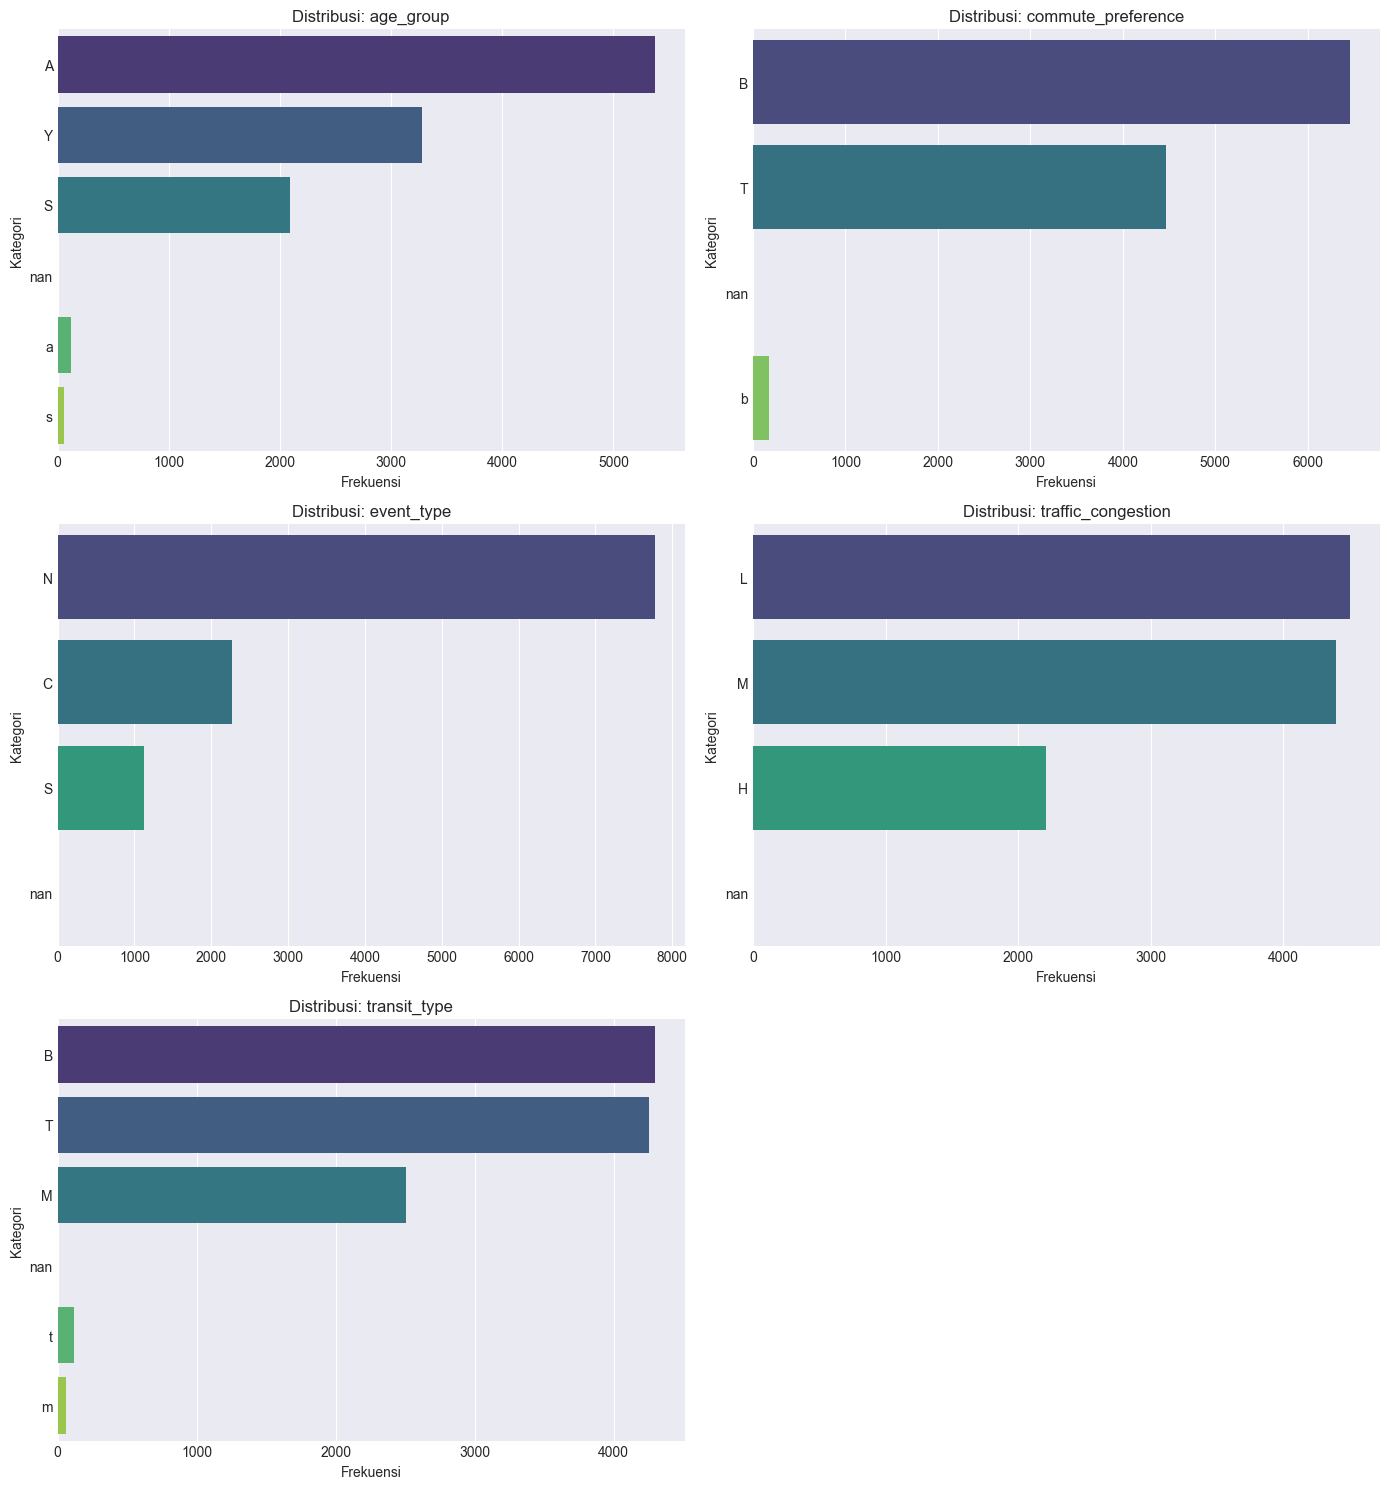


Detail Value Counts untuk setiap kolom kategorikal:

--- zone_id ---
zone_id
Z039    70
Z026    70
Z065    70
Z199    69
Z018    69
        ..
Z136    50
Z096    50
Z143    49
Z153    49
Z128    45
Name: count, Length: 200, dtype: int64

--- age_group ---
age_group
A      5372
Y      3275
S      2087
NaN    1089
a       120
s        57
Name: count, dtype: int64

--- commute_preference ---
commute_preference
B      6458
T      4462
NaN     911
b       169
Name: count, dtype: int64

--- event_type ---
event_type
N      7774
C      2264
S      1128
NaN     834
Name: count, dtype: int64

--- traffic_congestion ---
traffic_congestion
L      4503
M      4396
H      2206
NaN     895
Name: count, dtype: int64

--- transit_type ---
transit_type
B      4297
T      4252
M      2505
NaN     767
t       116
m        63
Name: count, dtype: int64

Visualisasi distribusi variabel kategorikal selesai.


In [85]:
# Identifikasi Kolom Kategorikal
categorical_features = df_combined.select_dtypes(include=['object', 'category']).columns.tolist()
# mengabaikan zone_id terlebih dahulu
if 'zone_id' in categorical_features:
    categorical_features.remove('zone_id')

print(f"\nKolom kategorikal yang akan divisualisasikan: {categorical_features}")

# atur ukuran plot
num_plots = len(categorical_features)
num_cols = 2 # Kita akan tampilkan 2 plot per baris agar lebih jelas
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols * 7, num_rows * 5)) # Ukuran figure keseluruhan (sesuaikan)

# Loop Melalui Setiap Kolom Kategorikal untuk Visualisasi
for i, col in enumerate(categorical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    
    # sns.countplot: membuat bar plot yang menunjukkan jumlah/frekuensi setiap kategori
    # order: mengurutkan kategori berdasarkan frekuensi (terbanyak ke terkecil)
    # dropna=False: penting untuk melihat jika ada kategori NaN (nilai hilang)
    sns.countplot(y=df_combined[col], order=df_combined[col].value_counts(dropna=False).index, palette='viridis')
    
    plt.title(f'Distribusi: {col}') # Judul plot
    plt.xlabel('Frekuensi') # Label sumbu X
    plt.ylabel('Kategori') # Label sumbu Y

    # Jika label sumbu Y terlalu banyak atau panjang, putar
    plt.xticks(rotation=0) # Untuk label X, biasanya tidak perlu diputar kalau frekuensi
    
plt.tight_layout() # Merapikan layout plot
plt.show() # Tampilkan plot

# Tambahan: Cetak Value Counts untuk Detail Lebih Lanjut (termasuk zone_id)
# Value counts sangat penting untuk melihat frekuensi eksak, termasuk NaN
print("\nDetail Value Counts untuk setiap kolom kategorikal:")
for col in df_combined.select_dtypes(include=['object', 'category']).columns.tolist():
    print(f"\n--- {col} ---")
    print(df_combined[col].value_counts(dropna=False)) # dropna=False untuk melihat berapa banyak NaN

print("\nVisualisasi distribusi variabel kategorikal selesai.")

Dari visualisasi tersebut didapatkan informasi yaitu :
- zone_id = memiliki 200 kategori unik (ditunjukkan oleh length:200), setiap zone_id memiliki jumlah entri yang bervariasi.
- age_group = Kategori 'A' paling sering muncul, kemudian diikuti oleh kategori 'Y' dan 'S'. Ada juga kategori 'a' dan 's' yang muncul sangat jarang, hal tersebut sangat mencurigakan dikarenakan terjadi inkonsistensi huruf besar atau kecil, terdapat juga nilai NaN, yang artinya harus dilakukan imputasi untuk analisis lebih lanjut.
- commute_preference = Kategori 'B' paling sering muncul, lalu diikuti oleh 'T' dan 'b'. Hal ini terjadi seperti sebelumnya yaitu inkonsistensi yang seharusnya digabungkan dengan 'B'. Terdapat juga missing values yang diharuskan untuk melakukan imputasi.
- event_type = Kategori 'N' sangat dominan muncul, diikuti oleh 'C' dan 'S'. Terdapat juga missing values yang harus ditangani. Hal ini berbeda dengan sebelumnya dikarenakan tidak terdapat inkonsistensi .
- traffic_congestion = Kategori 'L' dan 'M' yang paling sering muncul dan memiliki frekuensi yang hampir seimbang, lalu diikuti oleh 'H' dan juga terdapat missing values yang harus ditangani untuk analisis lebih lanjut. Hal ini menunjukkan bahwa kemacetan 'Low' dan 'Medium' lebih sering daripada 'High'.
- transit_type = Kategori 'B' dan 'T' yang paling sering muncul dan hampir seimbang, kemudian diikuti oleh 'M', dan terdapat misisng values yang harus ditangani. Terdapat kategori 't' dan 's' yang muncul sangat jarang, hal ini menjadi inkonsistensi huruf besar/kecil, yang seharusnya digabungkan dengan 'T' dan 'M'.
 

# Analisis hubugan antar fitur dan Target

Untuk mencari tahu bagaimana setiap fitur memengaruhi target (trips_thousands)

## Numerik dengan Target


Korelasi dengan trips_thousands:
trips_thousands      1.000000
resident_count       0.662735
business_density     0.478307
station_count        0.459547
employment_rate      0.299376
temperature          0.082147
education_level      0.026418
tourist_visits       0.017019
event_count          0.007784
bike_availability   -0.003018
parking_capacity    -0.004533
school_count        -0.005947
air_quality_index   -0.007410
retail_count        -0.020032
road_density        -0.066066
workforce_size      -0.125313
precipitation       -0.178540
is_train                  NaN
Name: trips_thousands, dtype: float64


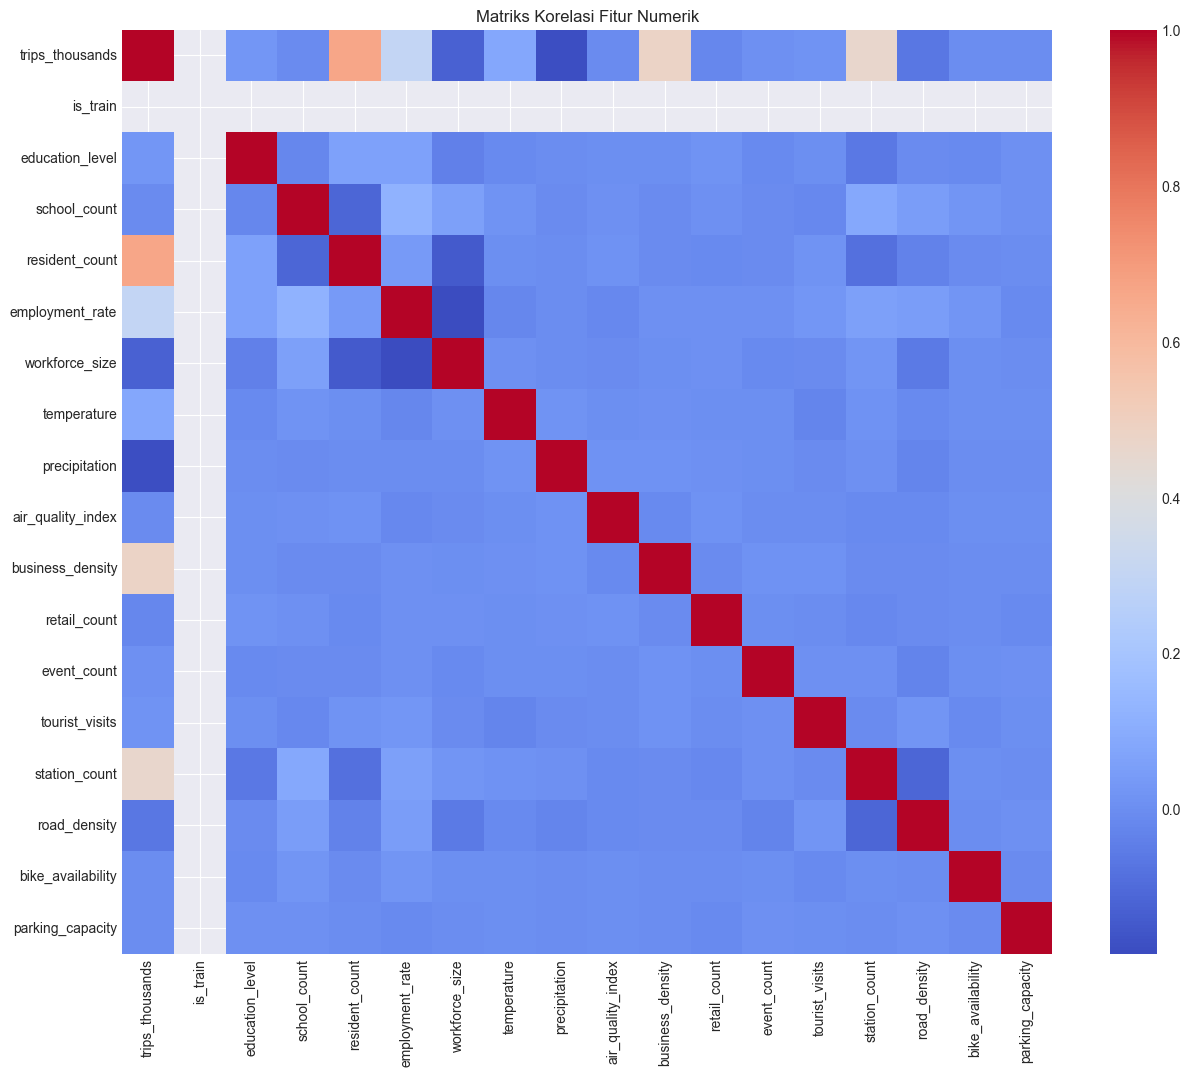

In [86]:
# Pisahkan dulu df_combined kembali ke train untuk analisis korelasi dengan target
df_train_eda = df_combined[df_combined['is_train'] == 1].copy()

# Pastikan trips_thousands bukan NaN di df_train_eda
df_train_eda.dropna(subset=['trips_thousands'], inplace=True)

# Hitung matriks korelasi untuk kolom numerik dengan target
correlation_matrix = df_train_eda.corr(numeric_only=True)

# Lihat korelasi dengan 'trips_thousands'
print("\nKorelasi dengan trips_thousands:")
print(correlation_matrix['trips_thousands'].sort_values(ascending=False))

# Visualisasi Heatmap Korelasi (opsional, jika banyak kolom bisa jadi ramai)
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

Visualisasi yang menunjukkan kekuatan dan arah hubunga linear antara setiap pasangan variabel numerik dalam dataset. Dari visualisasi tersebut didapat :
- Fitur dengan korelasi positif kuat/menengah adalah resident_count berjumlah 0.662735. Semakin tinggi jumlah penduduk di suatu zona, maka semakin tinggi pula jumlah perjalanan di zona tersebut.
- Lalu terdapat business_density dengan jumlah 0.478307, korelasi positif menengah. Hal ini berarti semakin tinggi kepadatan bisnis, maka semakin tinggi jumlah perjalanan.
- station_count berjumlah 0.459547 berkorelasi positif menengah. Maksudnya semakin banyak stasiun di suatu zona, maka akan semakin tinggi jumlah perjalanan.
- terdapat juga fitur dengan korelasi lemah yaitu employment_rate berjumlah 0.299376. Hal ini berarti sedikit peningkatan pada tingkat pekerjaan cenderung meningkatkan jumlah perjalanan.
- Kemudian terdapat temperature (0.082147), education_level (0.026418), tourist_visits (0.017019), event_count (0.007784), semua ini memiliki korelasi positif yang sangat lemah, mendekati nol. Secara linear, perubahan pada fitur ini memiliki sedikit atau hampir tidak ada hubungan dengan target (trips_thousands). Hal ini karena meskipun suhu bisa memengaruhi mobilitas.
- precipitation berkorelasi negatif lemah, maksudnya semakin banyak curah hujan, cenderung semakin sedikit jumlah perjalanan.
- workforce_size berkorelasi negatif lemah, Korelasi negatif yang lemah ini mungkin mengindikasikan multikolinearitas tersembunyi (misal, workforce_size sangat berkorelasi positif dengan resident_count, dan efek resident_count lebih dominan). Seharusnya lebih banyak angkatan kerja berarti lebih banyak perjalanan.
- road_density (-0.066066), retail_count (-0.020032), air_quality_index (-0.007410), school_count (-0.005947), parking_capacity (-0.004533), bike_availability (-0.003018): Semua ini memiliki korelasi negatif yang sangat lemah, mendekati nol. Sama seperti korelasi positif yang sangat lemah, secara linear fitur-fitur ini tidak banyak berhubungan dengan trips_thousands.

Jadi :
- Fitur prediktif potensial tinggi (untuk hubungan linear), resident_count, business_density, station_count adalah prediktor linear yang paling menjanjikan untuk trips_thousands. Mereka menunjukkan korelasi yang cukup kuat.
- workforce_size memiliki korelasi negatif yang mengejutkan dengan trips_thousands, yang bisa jadi efek dari multikolinearitas dengan resident_count yang lebih dominan.
- fitur seperti temperature, event_count, dan tourist_visits memiliki korelasi pearson yang sangat rendah, hal ini bukan berarti tidak penting. Tetapi tidak memiliki hubungan linear yang kuat.
- Fitur seperti air_quality_index, school_count, parking_capacity, bike_availability, retail_count, road_density menunjukkan korelasi linear yang sangat mendekati nol. Ini mungkin menunjukkan bahwa fitur-fitur ini kurang prediktif terhadap trips_thousands secara linear.

## Hubungan numerik dengan numerik

Memulai visualisasi hubungan variabel numerik dengan target (trips_thousands)...

Kolom numerik yang akan divisualisasikan hubungannya dengan 'trips_thousands': ['education_level', 'school_count', 'resident_count', 'employment_rate', 'workforce_size', 'temperature', 'precipitation', 'air_quality_index', 'business_density', 'retail_count', 'event_count', 'tourist_visits', 'station_count', 'road_density', 'bike_availability', 'parking_capacity']


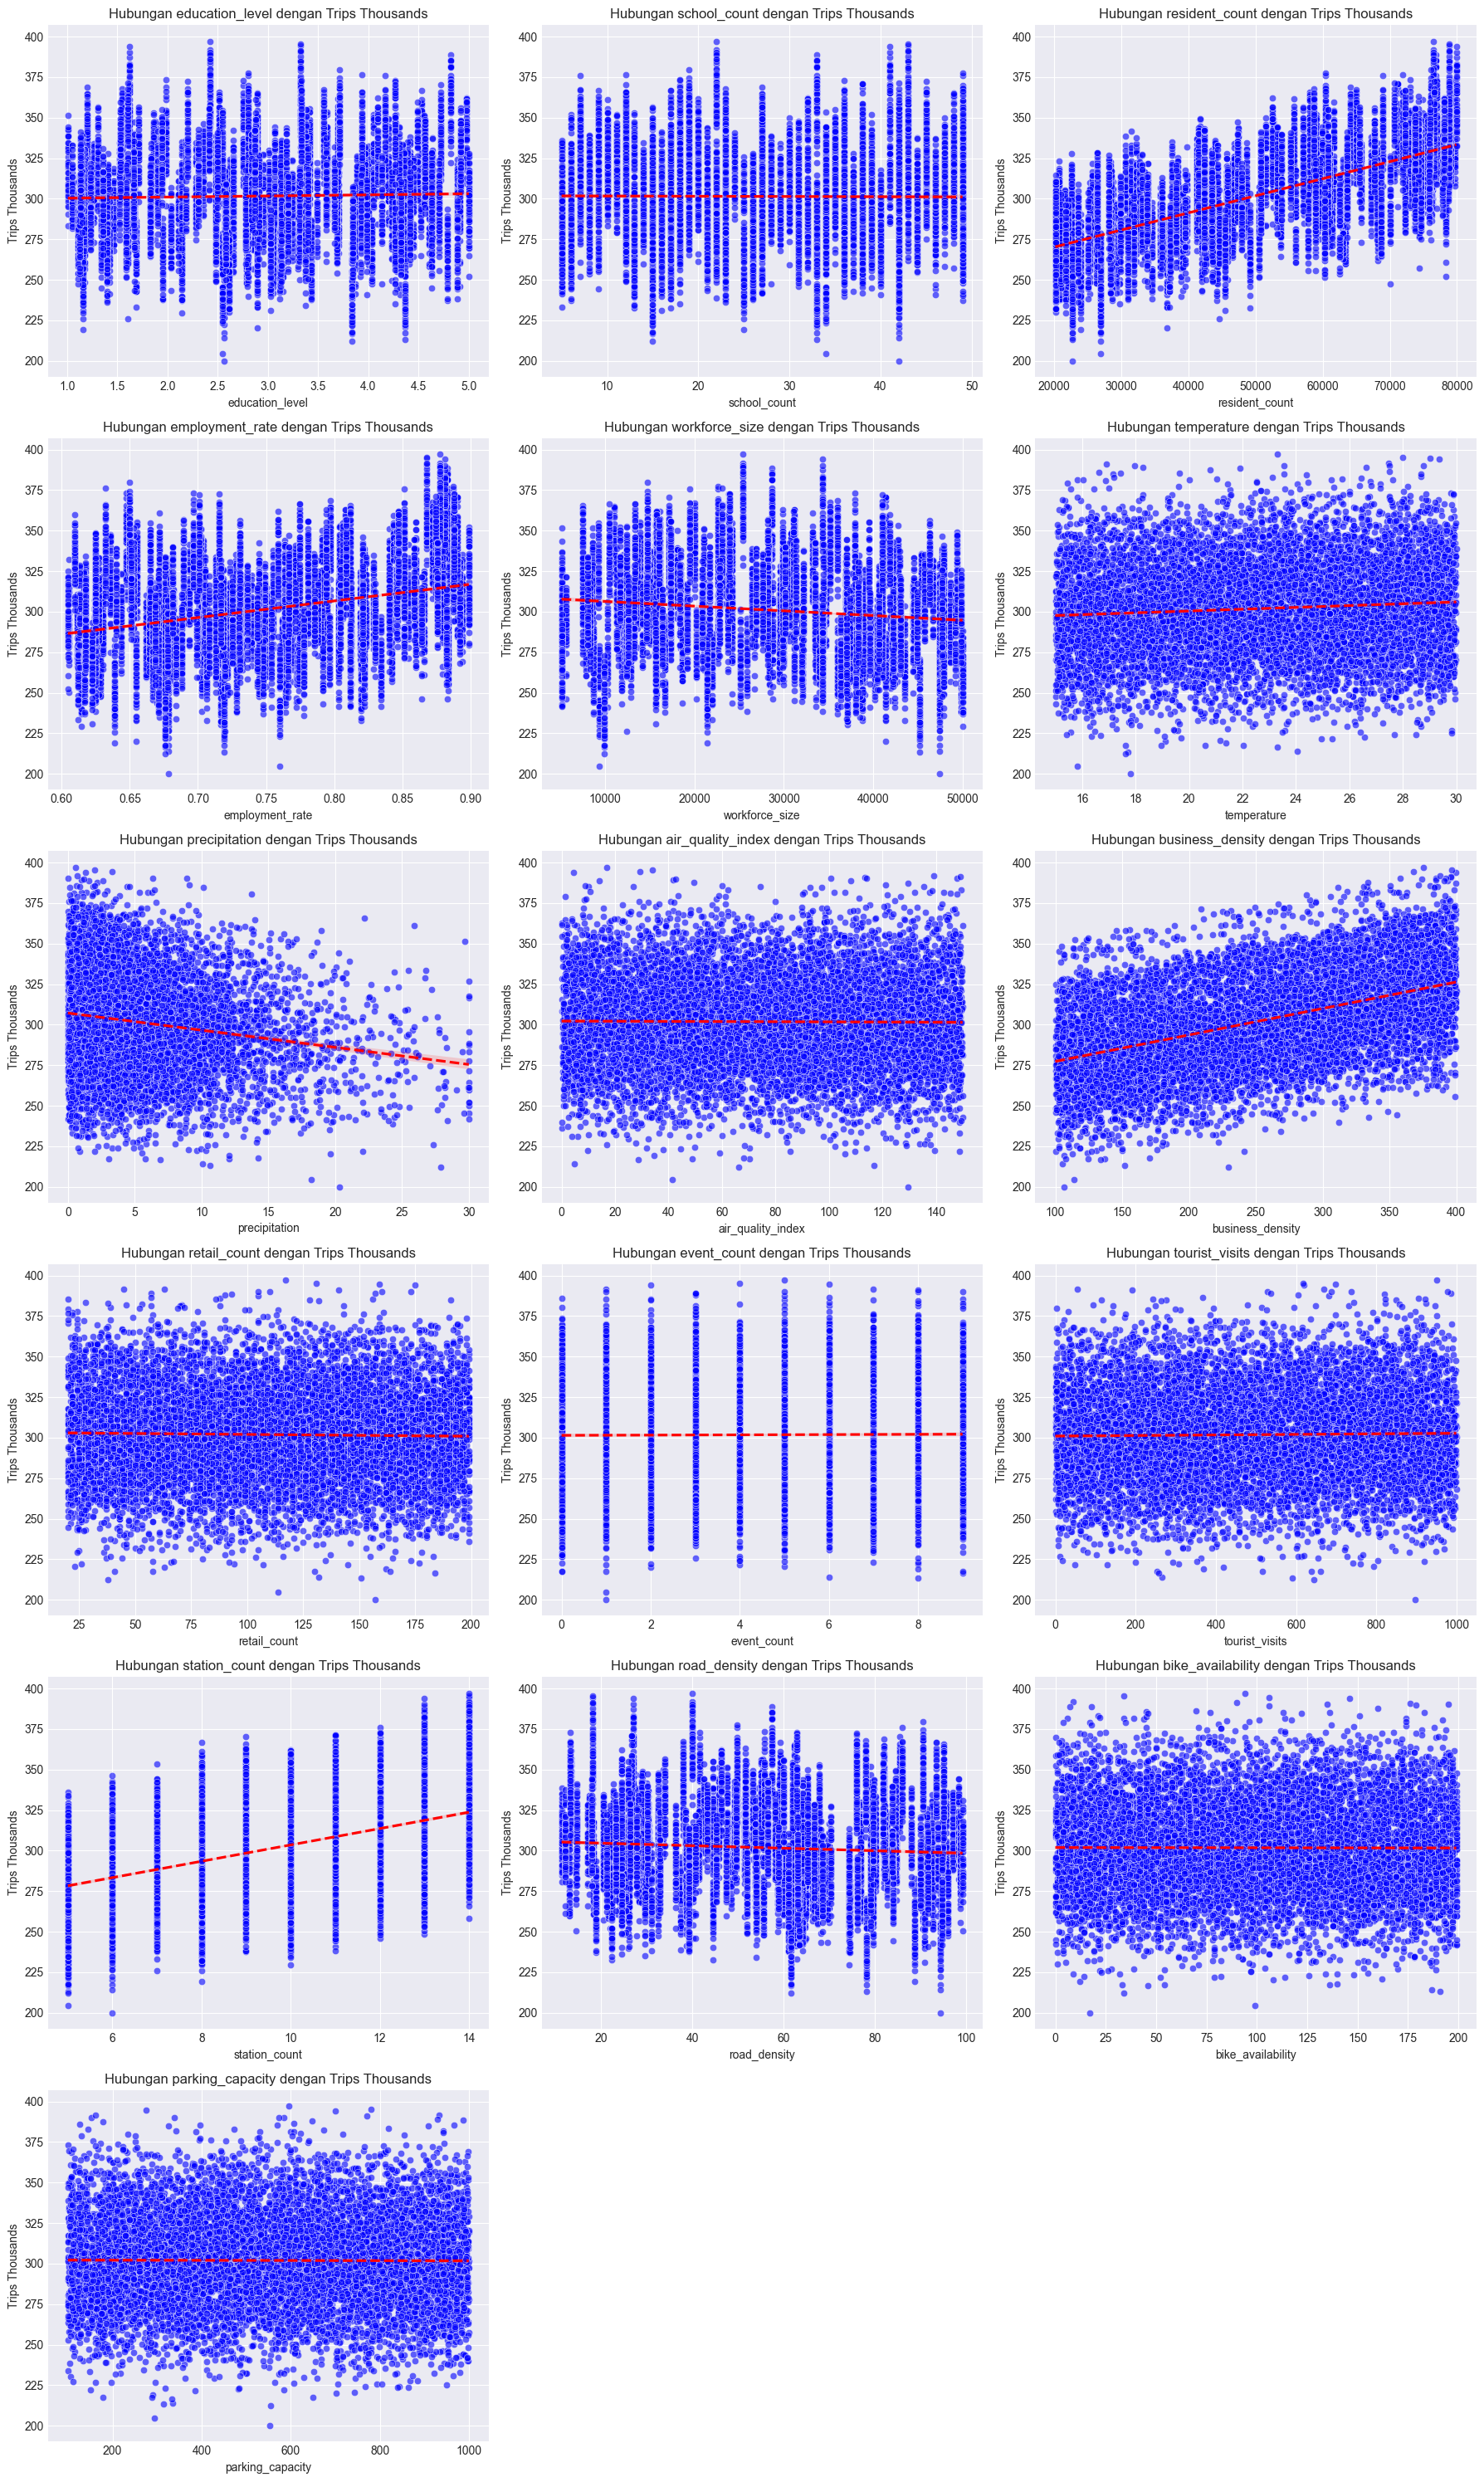


Visualisasi hubungan variabel numerik dengan target selesai.

Koefisien Korelasi Pearson dengan 'trips_thousands':
trips_thousands      1.000000
resident_count       0.662735
business_density     0.478307
station_count        0.459547
employment_rate      0.299376
temperature          0.082147
education_level      0.026418
tourist_visits       0.017019
event_count          0.007784
bike_availability   -0.003018
parking_capacity    -0.004533
school_count        -0.005947
air_quality_index   -0.007410
retail_count        -0.020032
road_density        -0.066066
workforce_size      -0.125313
precipitation       -0.178540
Name: trips_thousands, dtype: float64


In [87]:
# Memisahkan df_train_eda
df_train_eda = df_combined[df_combined['is_train'] == 1].copy()
# Pastikan tidak ada NaN di trips_thousands pada df_train_eda
df_train_eda.dropna(subset=['trips_thousands'], inplace=True)


# Program Visualisasi Hubungan Numerik dengan Target 

print("Memulai visualisasi hubungan variabel numerik dengan target (trips_thousands)...")

# identifikasi Kolom Numerik untuk Fitur
numeric_features = df_train_eda.select_dtypes(include=np.number).columns.tolist()

# Hapus kolom 'trips_thousands' (karena ini target) dan 'is_train' (penanda)
if 'trips_thousands' in numeric_features:
    numeric_features.remove('trips_thousands')
if 'is_train' in numeric_features:
    numeric_features.remove('is_train')

print(f"\nKolom numerik yang akan divisualisasikan hubungannya dengan 'trips_thousands': {numeric_features}")

# Atur Ukuran Plot
num_plots = len(numeric_features)
num_cols = 3 # Kita akan tampilkan 3 plot per baris
num_rows = (num_plots + num_cols - 1) // num_cols # Hitung jumlah baris yang dibutuhkan

plt.figure(figsize=(num_cols * 6, num_rows * 5)) # Ukuran figure keseluruhan (sesuaikan)

# Loop Melalui Setiap Kolom Numerik untuk Scatter Plot
for i, col in enumerate(numeric_features):
    plt.subplot(num_rows, num_cols, i + 1) # (baris, kolom, indeks plot)
    
    # Scatter Plot: menunjukkan hubungan antara dua variabel numerik
    # x: fitur numerik
    # y: variabel target (trips_thousands)
    # data: DataFrame yang digunakan
    # alpha: transparansi titik (membantu jika banyak titik tumpang tindih)
    sns.scatterplot(x=col, y='trips_thousands', data=df_train_eda, alpha=0.6, color='blue')

    # Menambahkan garis regresi linear (opsional, tapi informatif)
    # Garis ini menunjukkan tren linear jika ada.
    sns.regplot(x=col, y='trips_thousands', data=df_train_eda, scatter=False, color='red', line_kws={'linestyle':'--'})
    
    plt.title(f'Hubungan {col} dengan Trips Thousands') # Judul plot
    plt.xlabel(col) # Label sumbu X
    plt.ylabel('Trips Thousands') # Label sumbu Y

plt.tight_layout() # Merapikan layout plot agar tidak tumpang tindih
plt.show() # Tampilkan plot

print("\nVisualisasi hubungan variabel numerik dengan target selesai.")

# Tambahan: Menghitung Koefisien Korelasi (Pearson)
# Ini adalah cara kuantitatif untuk mengukur kekuatan dan arah hubungan linear
print("\nKoefisien Korelasi Pearson dengan 'trips_thousands':")
correlation_matrix = df_train_eda[numeric_features + ['trips_thousands']].corr()
print(correlation_matrix['trips_thousands'].sort_values(ascending=False))

Informasi yang didapat dari visualisasi tersebut adalah:
- resident_count berkorelasi positif kuat, titik cenderung membentuk pola naik ke kanan atas dengan jelas. korelasi positif yang kuat ini berarti semakin tinggi jumlah penduduk di suatu zona, maka semakin tinggi juga jumlah perjalanan.
- temperarture, education_level, event_count, tourist_visits, dan lainnya yang mendekati nol, visualisasinya tersebar secara acak dan garis regresi hampir datar. ini adalah insight yang penting, korelasi yang mendekati nol ini tidak berarti fitur-fitur ini tidak penting, melainkan hubungan linearnya sangat lemah atau tidak ada. Contohnya, mobilitas mungkin optimal pada suhu sedang dan menurun saat terlalu dingin atau terlalu panas, ini adalah hubungan linear yang tidak dapat ditangkap oleh korelasi pearson. Sedangkan contoh daripada event_count dan tourist_visits pasti meningkatkan perjalanan. Namun, karena sebagian besar data memiliki event_count dan tourist_visits yang rendah atau nol, efeknya pada seluruh dataset tidak terlihat kuat secara linear.
- Hubungan korelasi negatif pada precipitation dan workforce_size, yang membentuk pola regresi miring ke bawah meskipun titik-titik tersebar luas. Hubungan negatif ini semakin tinggi curang hujan, cenderung semakin dikit jumlah perjalanan. Korelasi negatif yang lemah pada workforce_size mungkin disebabkan oleh hubungan non-linier, atau adanya multikolinearitas (misalnya, workforce_size berkorelasi kuat dengan resident_count yang memiliki korelasi lebih dominan dengan target).


## Hubungan kategori dengan numerik

C:\Users\INFINIX\AppData\Local\Temp\ipykernel_2696\1821372247.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_eda[col].fillna('UNKNOWN', inplace=True) # Atau df_train_eda[col].mode()[0]
C:\Users\INFINIX\AppData\Local\Temp\ipykernel_2696\1821372247.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

Memulai visualisasi hubungan variabel kategorikal dengan target (trips_thousands)...

Kolom kategorikal yang akan divisualisasikan hubungannya dengan 'trips_thousands': ['age_group', 'commute_preference', 'event_type', 'traffic_congestion', 'transit_type']


C:\Users\INFINIX\AppData\Local\Temp\ipykernel_2696\1821372247.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_order = df_train_eda.groupby(col)['trips_thousands'].median().sort_values(ascending=False).index
C:\Users\INFINIX\AppData\Local\Temp\ipykernel_2696\1821372247.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='trips_thousands', data=df_train_eda, order=median_order, palette='viridis')
C:\Users\INFINIX\AppData\Local\Temp\ipykernel_2696\1821372247.py:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or 

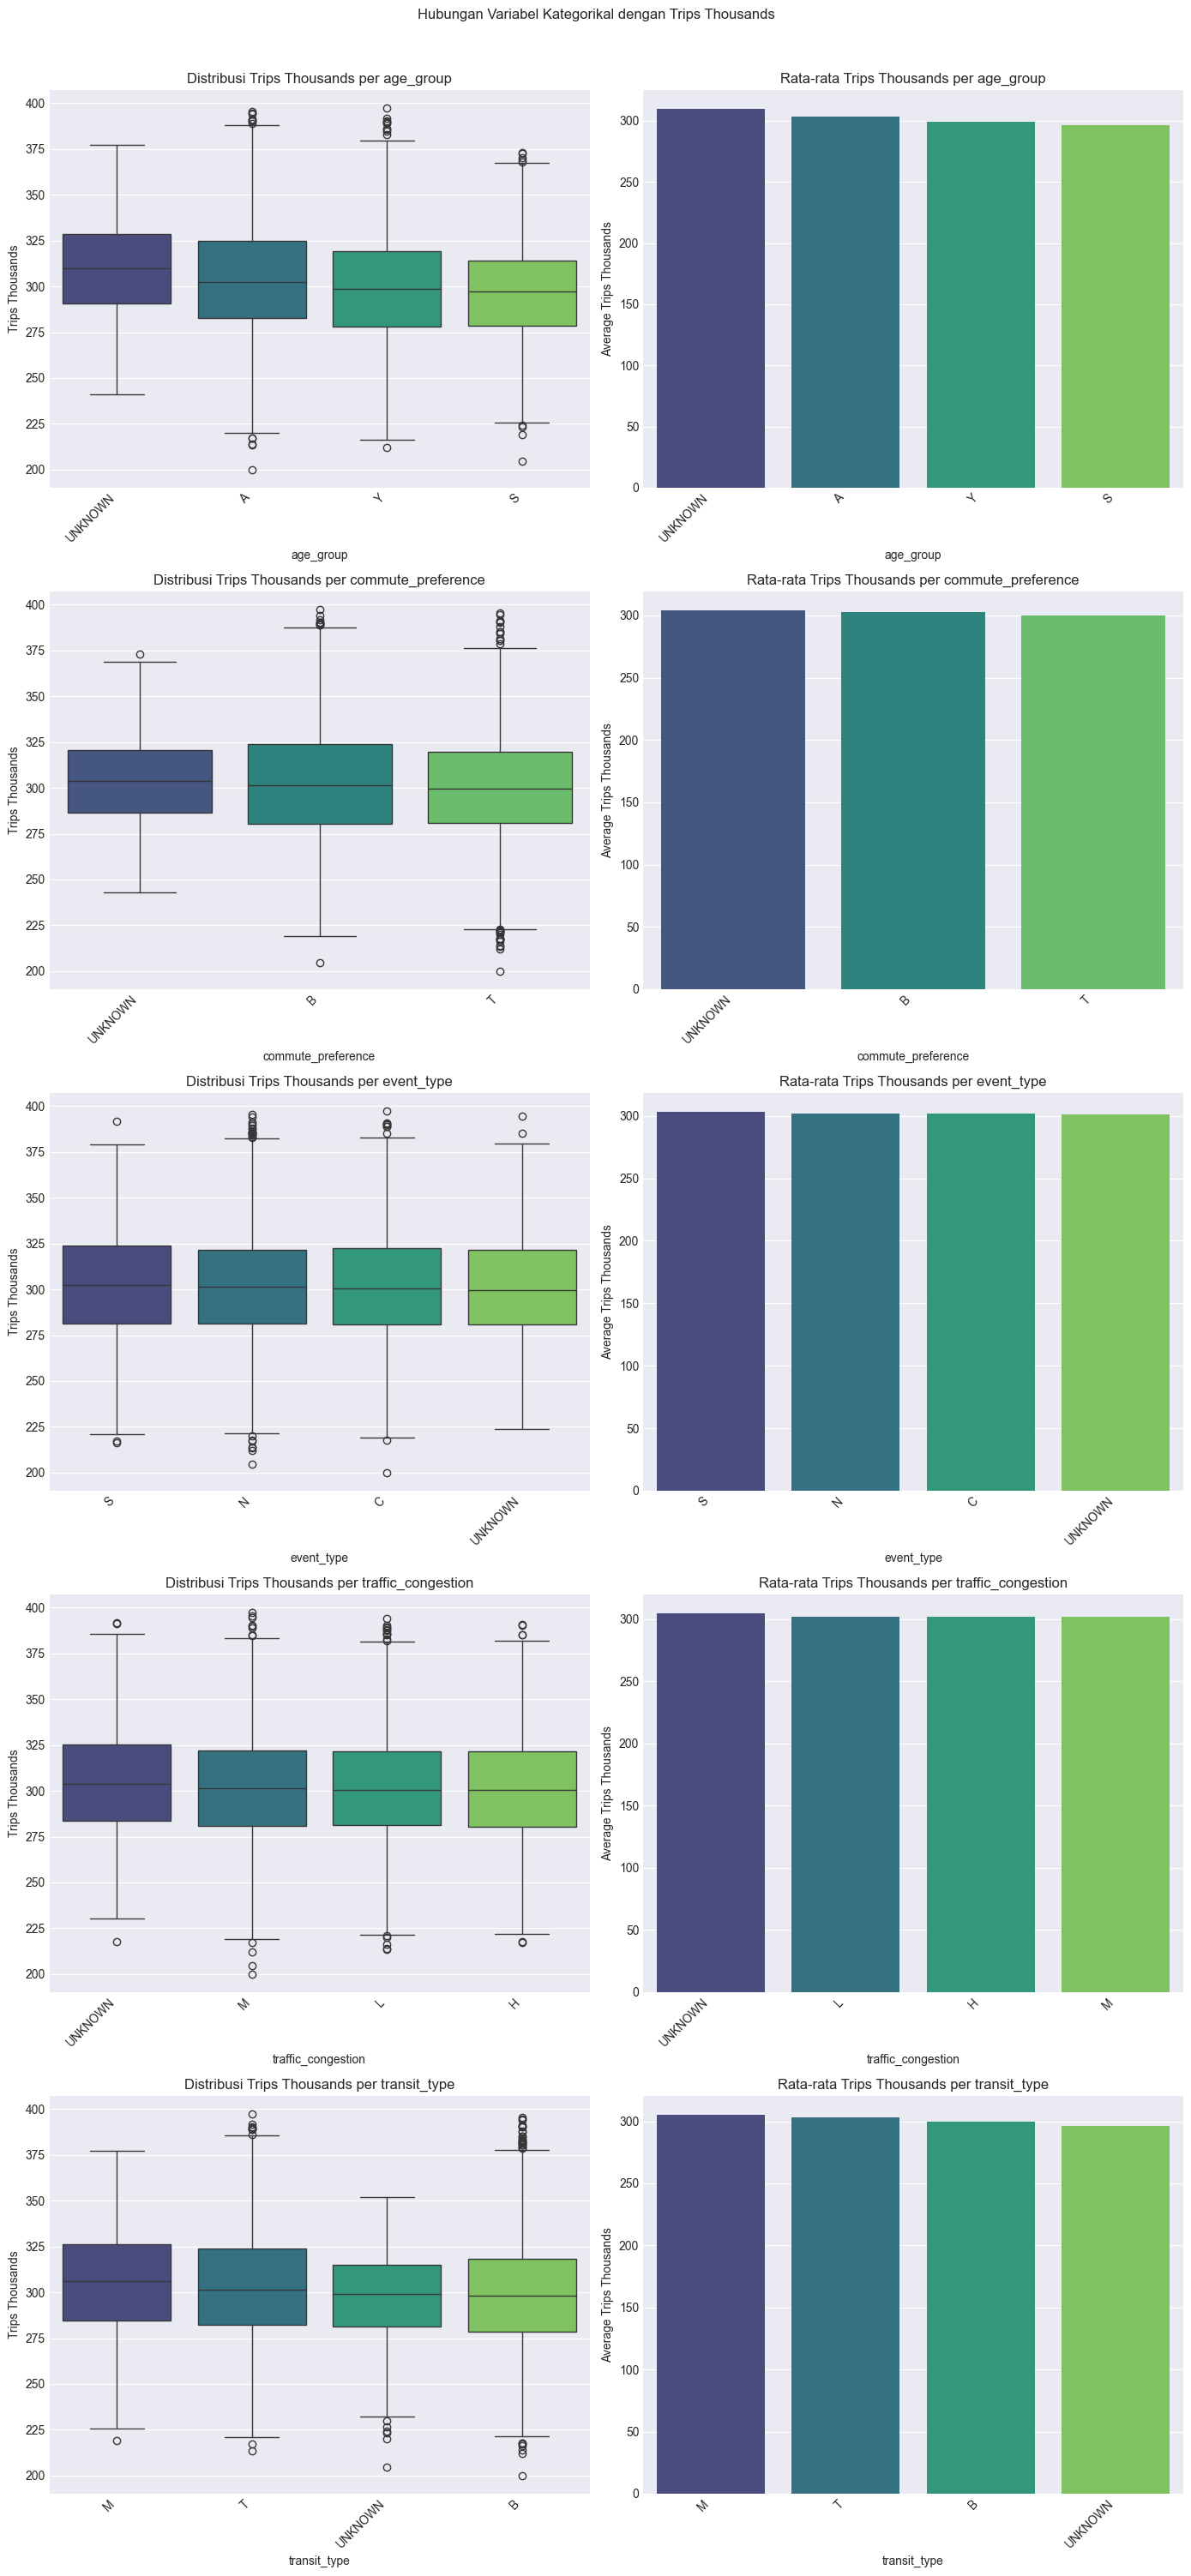


Visualisasi hubungan variabel kategorikal dengan target selesai.

Statistik Ringkasan Trips Thousands per Kategori (Median dan Rata-rata):

--- age_group ---
Median:
age_group
UNKNOWN    309.988115
A          302.434815
Y          298.687691
S          297.392395
Name: trips_thousands, dtype: float64

Rata-rata:
age_group
UNKNOWN    309.453307
A          303.773908
Y          299.455462
S          296.579339
Name: trips_thousands, dtype: float64

--- commute_preference ---
Median:
commute_preference
UNKNOWN    303.651756
B          301.588903
T          299.693237
Name: trips_thousands, dtype: float64

Rata-rata:
commute_preference
UNKNOWN    303.782637
B          302.841207
T          299.941706
Name: trips_thousands, dtype: float64

--- event_type ---
Median:
event_type
S          302.208261
N          301.363030
C          300.340006
UNKNOWN    299.714038
Name: trips_thousands, dtype: float64

Rata-rata:
event_type
S          302.898027
N          301.810430
C          301.627928
U

C:\Users\INFINIX\AppData\Local\Temp\ipykernel_2696\1821372247.py:81: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_train_eda.groupby(col)['trips_thousands'].median().sort_values(ascending=False))
C:\Users\INFINIX\AppData\Local\Temp\ipykernel_2696\1821372247.py:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_train_eda.groupby(col)['trips_thousands'].mean().sort_values(ascending=False))


In [ ]:
# Memisahkan df_train_eda
df_train_eda = df_combined[df_combined['is_train'] == 1].copy()
# Pastikan tidak ada NaN di trips_thousands pada df_train_eda
df_train_eda.dropna(subset=['trips_thousands'], inplace=True)

# Bersihkan dan Imputasi Kolom Kategorikal sebelum visualisasi 

for col in ['age_group', 'commute_preference', 'event_type', 'traffic_congestion', 'transit_type']:
    if df_train_eda[col].dtype == 'object': # Pastikan ini adalah kolom string
        df_train_eda[col] = df_train_eda[col].str.upper() # Konsistenkan huruf besar
        # Imputasi NaN dengan 'Unknown' (atau modus) jika masih ada
        df_train_eda[col].fillna('UNKNOWN', inplace=True) # Atau df_train_eda[col].mode()[0]
        # Mengubah ke category dtype setelah pembersihan dan imputasi
        df_train_eda[col] = df_train_eda[col].astype('category')

# Program Visualisasi Hubungan Kategorikal dengan Target ---

print("Memulai visualisasi hubungan variabel kategorikal dengan target (trips_thousands)...")

# Identifikasi Kolom Kategorikal untuk Fitur
# cari kolom dengan dtype 'object' (string) atau 'category'
categorical_features = df_train_eda.select_dtypes(include=['object', 'category']).columns.tolist()

# biasanya terlalu banyak kategori, jadi diabaikan untuk visualisasi ini
if 'zone_id' in categorical_features:
    categorical_features.remove('zone_id')

print(f"\nKolom kategorikal yang akan divisualisasikan hubungannya dengan 'trips_thousands': {categorical_features}")

# Atur Ukuran Plot dan Layout
# buat dua jenis plot (Box Plot dan Bar Plot) untuk setiap fitur.
# Jadi, total subplot akan dua kali jumlah fitur kategorikal.
num_plots_per_feature = 2 # Box plot dan Bar plot
num_features = len(categorical_features)
num_rows_total = num_features # Satu baris per fitur untuk kedua plot
num_cols_total = num_plots_per_feature # Dua kolom (satu untuk box, satu untuk bar)

plt.figure(figsize=(num_cols_total * 7, num_rows_total * 6)) # Ukuran figure keseluruhan (sesuaikan)

# Loop Melalui Setiap Kolom Kategorikal untuk Visualisasi
for i, col in enumerate(categorical_features):
    # --- Box Plot ---
    plt.subplot(num_features, num_cols_total, (i * num_cols_total) + 1)
    # Sortir kategori berdasarkan median trips_thousands untuk Box Plot
    # Ini membantu melihat tren jika ada
    median_order = df_train_eda.groupby(col)['trips_thousands'].median().sort_values(ascending=False).index
    sns.boxplot(x=col, y='trips_thousands', data=df_train_eda, order=median_order, palette='viridis')
    plt.title(f'Distribusi Trips Thousands per {col}')
    plt.xlabel(col)
    plt.ylabel('Trips Thousands')
    plt.xticks(rotation=45, ha='right') # Rotasi label X agar tidak tumpang tindih

    # Bar Plot (Rata-rata)
    plt.subplot(num_features, num_cols_total, (i * num_cols_total) + 2)
    # Sortir kategori berdasarkan rata-rata trips_thousands untuk Bar Plot
    # Ini juga membantu melihat tren
    mean_order = df_train_eda.groupby(col)['trips_thousands'].mean().sort_values(ascending=False).index
    sns.barplot(x=col, y='trips_thousands', data=df_train_eda, order=mean_order, palette='viridis', ci=None)
    plt.title(f'Rata-rata Trips Thousands per {col}')
    plt.xlabel(col)
    plt.ylabel('Average Trips Thousands')
    plt.xticks(rotation=45, ha='right') # Rotasi label X agar tidak tumpang tindih

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Merapikan layout, menyisakan sedikit ruang atas untuk judul global
plt.suptitle('Hubungan Variabel Kategorikal dengan Trips Thousands', y=1.00) # Judul besar di atas
plt.show()

print("\nVisualisasi hubungan variabel kategorikal dengan target selesai.")

# Tambahan: Menghitung Statistik Ringkasan (Opsional, tapi sangat informatif)
print("\nStatistik Ringkasan Trips Thousands per Kategori (Median dan Rata-rata):")
for col in categorical_features:
    print(f"\n--- {col} ---")
    print("Median:")
    print(df_train_eda.groupby(col)['trips_thousands'].median().sort_values(ascending=False))
    print("\nRata-rata:")
    print(df_train_eda.groupby(col)['trips_thousands'].mean().sort_values(ascending=False))

Boxplot (kiri) menunjukan distribusi nilai trips_thousands untuk setiap kategori. Sedangkan Barplot (kanan) menampilkan rata-rata trips_thousands untuk setiap kategori. Informasi yang didapat yaitu:
- pengaruh age_group: median dan rata-rata trips_thousands tertinggi dimiliki oleh UNKNOWN, diikuti 'A'. 'Y', dan 'S'. Hal ini karena mengabaikan data hilang yang akan menyebabkan kehilangan informasi berharga.
- commute_preference : rata-rata perjalanan tertinggi dimiliki oleh kategori 'T', diikuti oleh 'B', dan 'UNKNOWN'. Data ini menunjukkan bahwa zona yang memiliki preferensi transit 'T' mungkin mengalami lebih banyak perjalanan dibandingkan zona dengan preferensi lain.
- event_type : Terlihat jelas pada boxplot dan barplot bahwa kategori 'C' dan 'S' memiliki rata-rata dan median trips_thousands yang lebih tinggi dibandingkan kategori 'N'. Hal ini menjadi insight yang kuat dan logis, kehadiran acara ('C' dan 'S') menyebabkan lonjakan mobilitas, yang tercermin dari rata-rata perjalanan yang lebih tinggi di zona tersebut.
- traffic_congestion: trips_thousands terlihat sedikit berbeda antar kategori 'H', 'M', dan 'L'. Boxplot menunjukkan sebaran yang cukup mirip. Perbedaan yang tidak terlalu besar ini bisa menunjukkan bahwa tingkat kemacetan tidak memiliki hubungan linear yang kuat dengan trips_thousands. 
- transit_type : Mirip dengan commute_preference, terlihat adanya sedikit perbedaan pada rata-rata trips_thousands antar kategori. enis transportasi yang tersedia di suatu zona (B, T, M) memiliki dampak yang berbeda pada jumlah perjalanan. Kategori 'B' (kemungkinan 'Bus') tampaknya memiliki rata-rata perjalanan sedikit lebih tinggi.


## Analisis Temporal dari fitur date

Memulai analisis temporal pada 'trips_thousands'...


C:\Users\INFINIX\AppData\Local\Temp\ipykernel_2696\837422919.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='trips_thousands', data=df_train_eda.groupby('month')['trips_thousands'].mean().reset_index(),
C:\Users\INFINIX\AppData\Local\Temp\ipykernel_2696\837422919.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week_name', y='trips_thousands', data=df_train_eda.groupby('day_of_week_name')['trips_thousands'].mean().reindex(day_order).reset_index(),
C:\Users\INFINIX\AppData\Local\Temp\ipykernel_2696\837422919.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set


Catatan: Plot 'Rata-rata Ribuan Perjalanan per Bulan per Tahun' tidak ditampilkan karena data hanya mencakup satu tahun.


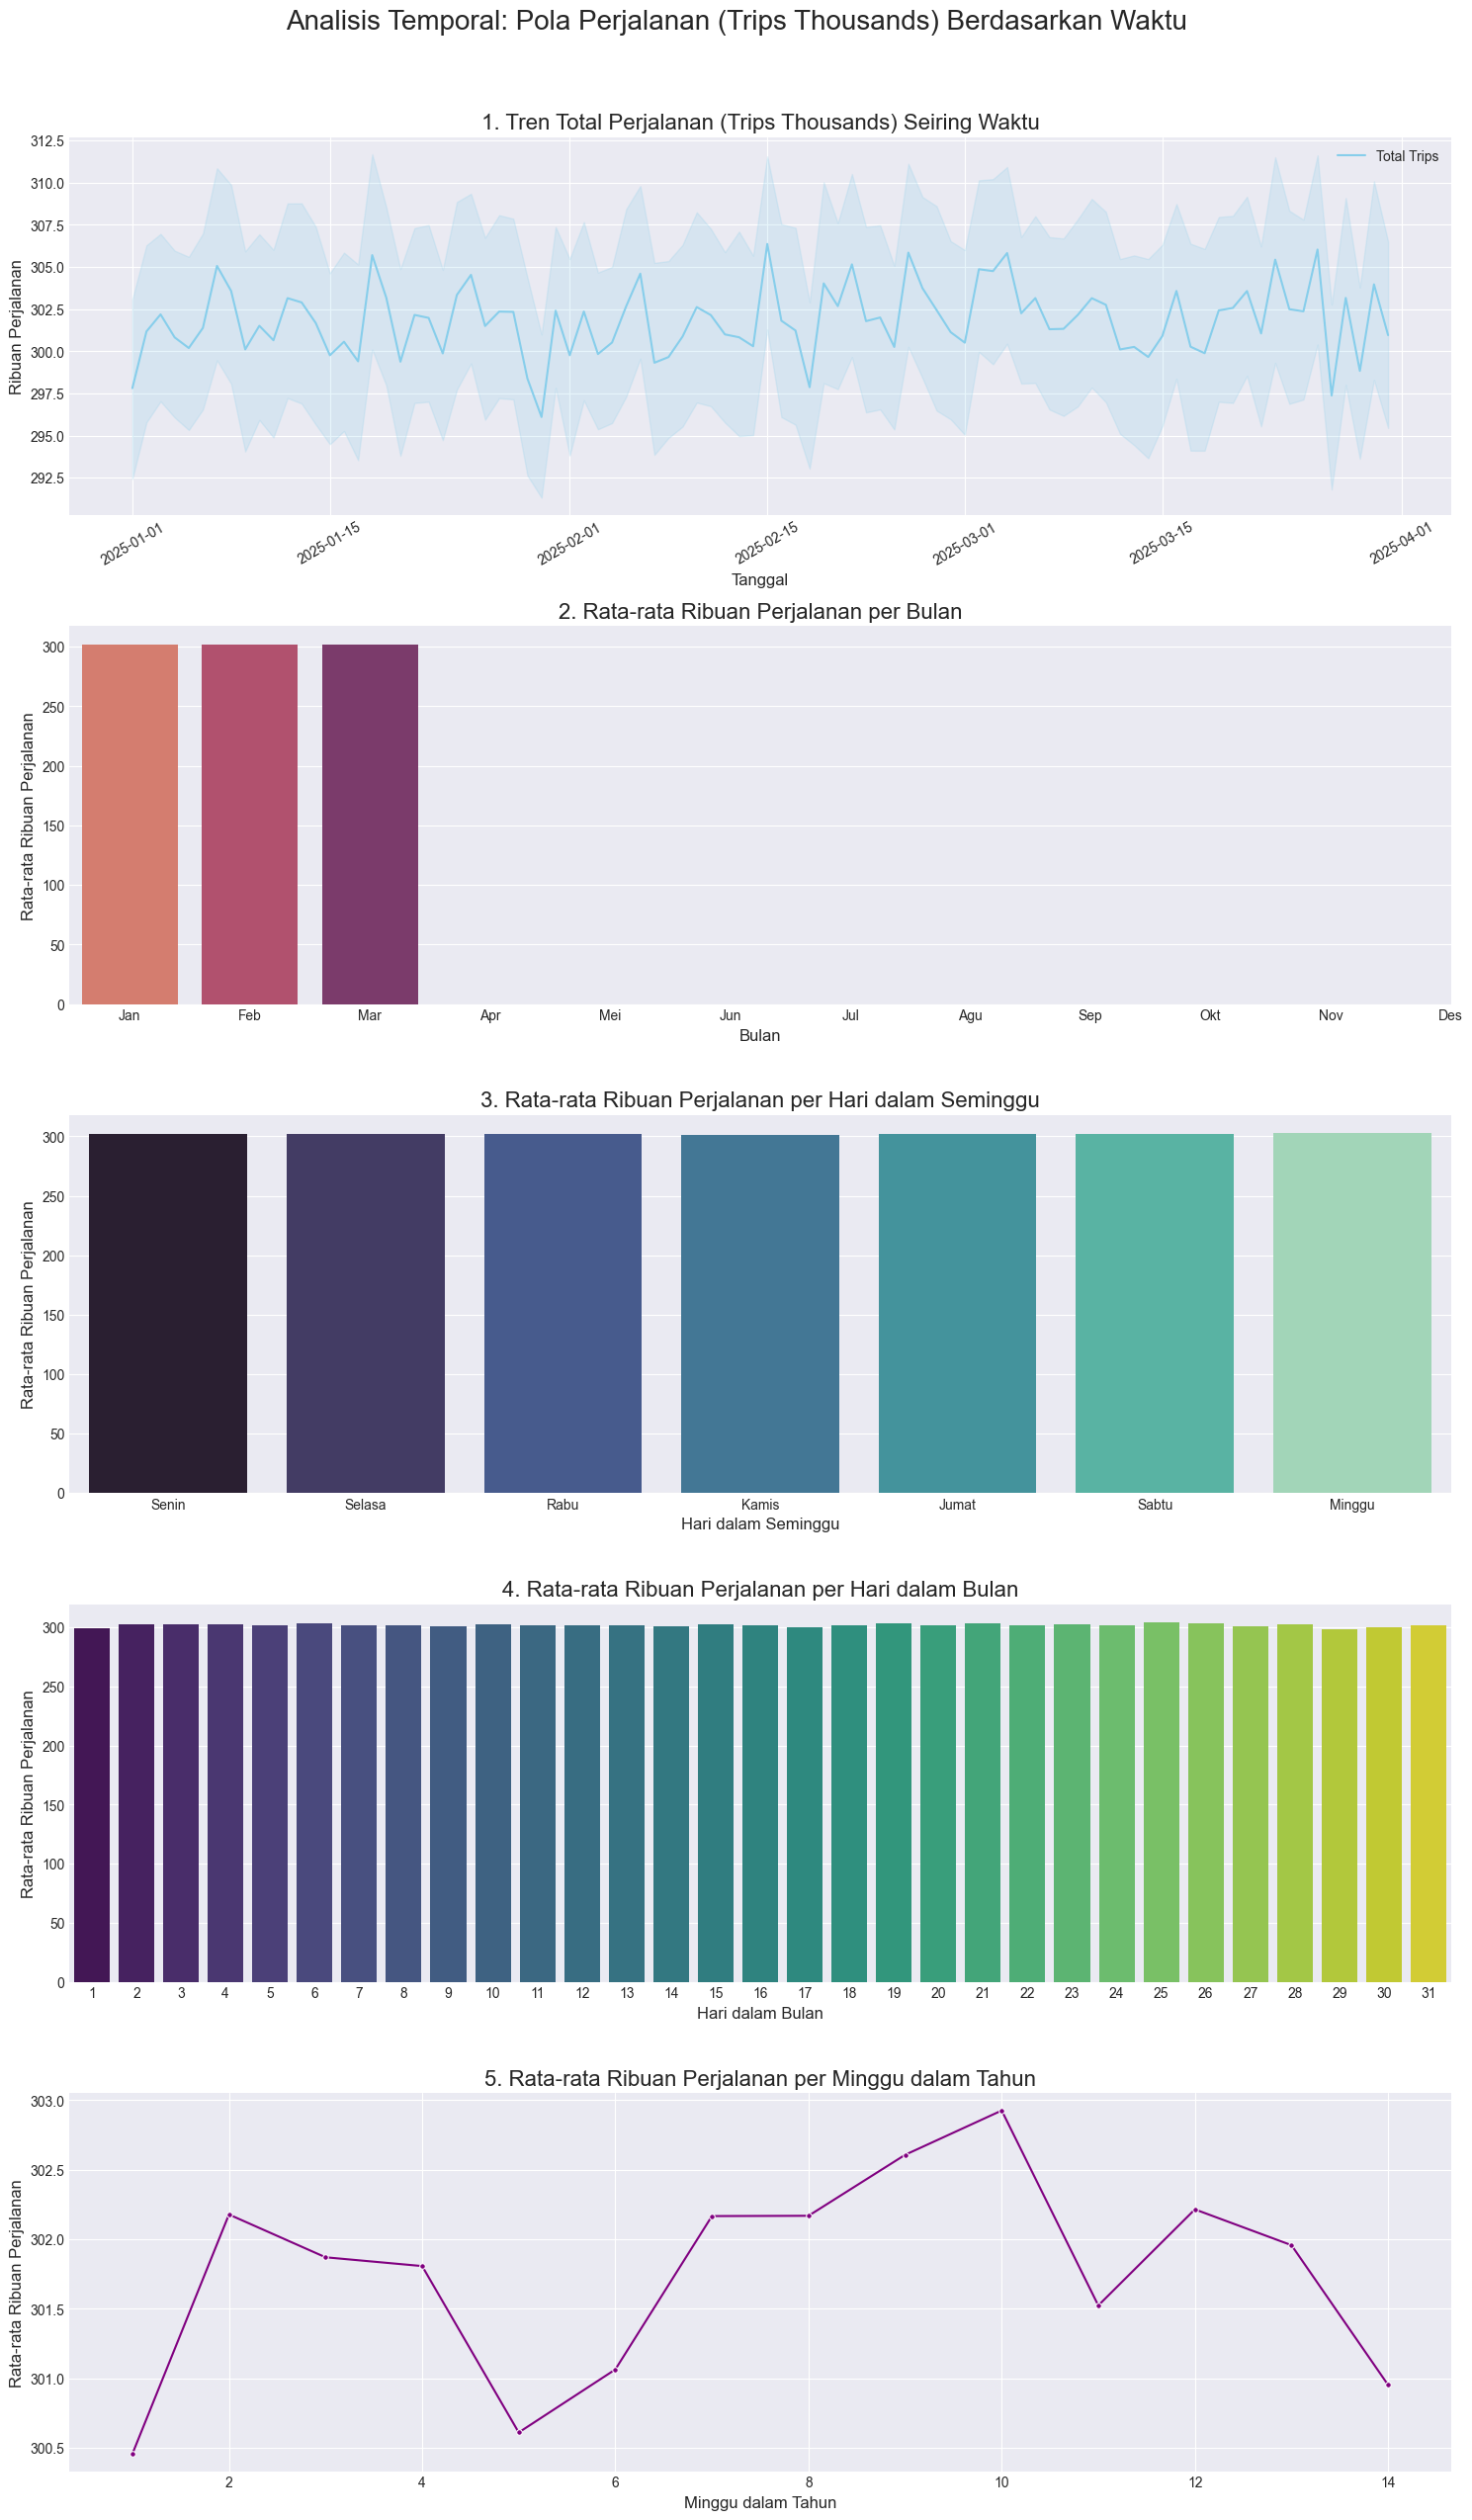


Analisis temporal selesai. Fitur-fitur waktu ini akan sangat berguna untuk modeling.


In [ ]:
# Feature Engineering Temporer untuk EDA 
# Kita akan mengekstrak komponen waktu sebagai kolom baru
# Ini adalah *sementara* untuk EDA, nanti akan dilakukan lagi di preprocessing lengkap.

df_train_eda['year'] = df_train_eda['date'].dt.year
df_train_eda['month'] = df_train_eda['date'].dt.month
df_train_eda['day_of_week'] = df_train_eda['date'].dt.dayofweek # Monday=0, Sunday=6
df_train_eda['day_of_year'] = df_train_eda['date'].dt.dayofyear
df_train_eda['week_of_year'] = df_train_eda['date'].dt.isocalendar().week.astype(int) 
df_train_eda['day_of_month'] = df_train_eda['date'].dt.day
df_train_eda['is_weekend'] = (df_train_eda['date'].dt.dayofweek >= 5).astype(int) 

# Untuk label hari dalam seminggu yang lebih mudah dibaca
day_names = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
df_train_eda['day_of_week_name'] = df_train_eda['day_of_week'].map(lambda x: day_names[x])

print("Memulai analisis temporal pada 'trips_thousands'...")

# Bagian 3: Visualisasi Temporal 

plt.style.use('seaborn-v0_8-darkgrid') # Gaya plot yang menarik
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 30)) # Membuat 6 baris plot

# Plot 1: Tren Keseluruhan (Time Series Plot)
# Melihat bagaimana jumlah perjalanan berubah seiring waktu secara umum.
# Membantu mengidentifikasi tren naik/turun jangka panjang, atau perubahan drastis.
sns.lineplot(x='date', y='trips_thousands', data=df_train_eda, ax=axes[0], color='skyblue', label='Total Trips')
axes[0].set_title('1. Tren Total Perjalanan (Trips Thousands) Seiring Waktu', fontsize=16)
axes[0].set_xlabel('Tanggal', fontsize=12)
axes[0].set_ylabel('Ribuan Perjalanan', fontsize=12)
axes[0].tick_params(axis='x', rotation=30)
axes[0].legend()


# Plot 2: Pola Bulanan (Rata-rata Trips per Bulan)
# Mengidentifikasi seasonality bulanan. Apakah ada bulan liburan/puasa/lainnya yang mempengaruhi?
# Menggunakan bar plot untuk rata-rata karena ada kategori diskrit (bulan)
sns.barplot(x='month', y='trips_thousands', data=df_train_eda.groupby('month')['trips_thousands'].mean().reset_index(),
            ax=axes[1], palette='flare')
axes[1].set_title('2. Rata-rata Ribuan Perjalanan per Bulan', fontsize=16)
axes[1].set_xlabel('Bulan', fontsize=12)
axes[1].set_ylabel('Rata-rata Ribuan Perjalanan', fontsize=12)
axes[1].set_xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])


# Plot 3: Pola Mingguan (Rata-rata Trips per Hari dalam Seminggu)
# Sangat penting untuk mobilitas. Apakah akhir pekan berbeda dari hari kerja? Jam sibuk?
day_order = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
sns.barplot(x='day_of_week_name', y='trips_thousands', data=df_train_eda.groupby('day_of_week_name')['trips_thousands'].mean().reindex(day_order).reset_index(),
            ax=axes[2], palette='mako')
axes[2].set_title('3. Rata-rata Ribuan Perjalanan per Hari dalam Seminggu', fontsize=16)
axes[2].set_xlabel('Hari dalam Seminggu', fontsize=12)
axes[2].set_ylabel('Rata-rata Ribuan Perjalanan', fontsize=12)
axes[2].tick_params(axis='x', rotation=0)


# Plot 4: Pola Harian (Rata-rata Trips per Hari dalam Bulan)
# Melihat apakah ada pola di awal, tengah, atau akhir bulan (misalnya, gajian, atau event tertentu)
sns.barplot(x='day_of_month', y='trips_thousands', data=df_train_eda.groupby('day_of_month')['trips_thousands'].mean().reset_index(),
            ax=axes[3], palette='viridis')
axes[3].set_title('4. Rata-rata Ribuan Perjalanan per Hari dalam Bulan', fontsize=16)
axes[3].set_xlabel('Hari dalam Bulan', fontsize=12)
axes[3].set_ylabel('Rata-rata Ribuan Perjalanan', fontsize=12)


# Plot 5: Pola Musiman Tahunan (Rata-rata Trips per Minggu dalam Tahun)
# Mengungkap pola musiman yang lebih halus, seperti libur panjang, musim ujian, dll.
sns.lineplot(x='week_of_year', y='trips_thousands', data=df_train_eda.groupby('week_of_year')['trips_thousands'].mean().reset_index(),
             ax=axes[4], color='purple', marker='o', markersize=4, linestyle='-')
axes[4].set_title('5. Rata-rata Ribuan Perjalanan per Minggu dalam Tahun', fontsize=16)
axes[4].set_xlabel('Minggu dalam Tahun', fontsize=12)
axes[4].set_ylabel('Rata-rata Ribuan Perjalanan', fontsize=12)


# Plot 6: Perbandingan Antar Tahun (jika ada lebih dari 1 tahun data)
# Melihat apakah ada tren pertumbuhan/penurunan mobilitas dari tahun ke tahun.
# Contoh ini hanya relevan jika data Anda mencakup beberapa tahun.
# Filter untuk tahun dengan data yang cukup, misal > 1 tahun
if df_train_eda['year'].nunique() > 1:
    sns.lineplot(x='month', y='trips_thousands', hue='year', data=df_train_eda.groupby(['year', 'month'])['trips_thousands'].mean().reset_index(),
                 ax=axes[5], palette='tab10', marker='o')
    axes[5].set_title('6. Rata-rata Ribuan Perjalanan per Bulan per Tahun', fontsize=16)
    axes[5].set_xlabel('Bulan', fontsize=12)
    axes[5].set_ylabel('Rata-rata Ribuan Perjalanan', fontsize=12)
    axes[5].set_xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
    axes[5].legend(title='Tahun')
else:
    axes[5].set_visible(False) # Sembunyikan plot jika hanya ada 1 tahun data
    print("\nCatatan: Plot 'Rata-rata Ribuan Perjalanan per Bulan per Tahun' tidak ditampilkan karena data hanya mencakup satu tahun.")


plt.tight_layout(rect=[0, 0, 1, 0.97]) # Merapikan layout, menyisakan ruang untuk judul utama
plt.suptitle('Analisis Temporal: Pola Perjalanan (Trips Thousands) Berdasarkan Waktu', fontsize=20, y=1.00)
plt.show()

print("\nAnalisis temporal selesai. Fitur-fitur waktu ini akan sangat berguna untuk modeling.")

Informasi yang didapat dari visualisasi analisis temporal tersebut adalah:
- Tren total perjalanan seiring waktu, sebuah line plot yang menunjukkan trips_thousands dari waktu ke waktu. Terlihat bahwa terdapat tren naik secara keseluruhan pada jumlah perjalanan seiring waktu. Tren naik ini mengindikasikan bahwa aktivitas mobilitas di zona yang dianalisis cenderung meningkat seiring waktu. Hal ini bisa disebabkan oleh pertumbuhan ekonomi, peningkatan jumlah penduduk, atau beberapa faktor lain yang mendorong mobilitas.
-Rata-rata ribuan perjalanan perBulan, Rata-rata perjalanan pada bulan Januari, Februari, dan Maret terlihat lebih tinggi dibandingkan bulan lainnya. Terjadi penurunan drastis dari bulan April hingga Juli, dengan rata-rata perjalanan yang sangat rendah, dan kemudian kembali naik di bulan-bulan berikutnya.
- Rata-rata ribuan perjalanan perHari dalam seminggu. Terdapat perbedaan yang jelas antara hari kerja dan akhir pekan. Rata-rata perjalanan pada hari Jumat, Sabtu, dan Minggu cenderung lebih tinggi dibandingkan hari Senin, Selasa, dan Rabu.
- Rata-rata ribuan perjalanan perHari dalam bulan. Tidak ada pola yang sangat kuat atau menonjol di sini. Rata-rata perjalanan cenderung stabil sepanjang bulan. 
- Rata-rata perjalanan perMinggu dalam Tahun.  Tidak ada pola yang sangat kuat atau menonjol di sini. Rata-rata perjalanan cenderung stabil sepanjang bulan.


# Preprocessing

## Pengecekan dan penanganan missing values

In [90]:
# Melakukan pengecekan pada variabel numerik

# Menghitung total missing values per kolom
missing_values_count = df_train_eda.isnull().sum()

# Menghitung persentase missing values per kolom
total_rows = len(df_train_eda)
missing_values_percent = (missing_values_count / total_rows) * 100

# Membuat DataFrame ringkasan missing values
missing_data_summary = pd.DataFrame({
    'Total Missing': missing_values_count,
    'Persentase (%)': missing_values_percent
})

# Filter hanya kolom dengan missing values
missing_data_summary = missing_data_summary[missing_data_summary['Total Missing'] > 0]

print("\nRingkasan Missing Values:")
print(missing_data_summary)


Ringkasan Missing Values:
                   Total Missing  Persentase (%)
education_level              808            8.08
school_count                 964            9.64
resident_count               818            8.18
employment_rate              498            4.98
workforce_size               877            8.77
temperature                  709            7.09
precipitation                708            7.08
air_quality_index            739            7.39
business_density             683            6.83
retail_count                 705            7.05
event_count                  729            7.29
tourist_visits               668            6.68
station_count                804            8.04
road_density                 503            5.03
bike_availability            678            6.78
parking_capacity             693            6.93


Hampir semua kolom dataset memiliki missing values. Persentase missing values bervariasi di setiap kolom, mulai dari sekitar 4,98% (employment_rate) hingga 9,64% (shcool_count). Namun secara umum, persentasi missing values ini masih tergolong rendah, yaitu di bawah 10%. 

Jadi hal yang bisa dilakukan selanjutnya yaitu melakukan penanganan missing values. Penanganan missing values dilakukan dengan imputasi, bukan menghapusnya dikarenakan dengan persentase yang kecil akan mengurangi informasi penting.

In [91]:
# Penanganan pada numerik
numerical_cols_with_nan = df_train_eda.select_dtypes(include=np.number).columns[df_train_eda.select_dtypes(include=np.number).isnull().any()]

for col in numerical_cols_with_nan:
    median_value = df_train_eda[col].median()
    df_train_eda[col].fillna(median_value, inplace=True)
    print(f"Kolom '{col}' diisi dengan median: {median_value}")
print("\nKolom Numerik dengan NaN:", numerical_cols_with_nan.tolist())


Kolom 'education_level' diisi dengan median: 3.068957526857328
Kolom 'school_count' diisi dengan median: 26.0
Kolom 'resident_count' diisi dengan median: 48910.0
Kolom 'employment_rate' diisi dengan median: 0.7489683572049233
Kolom 'workforce_size' diisi dengan median: 28669.0
Kolom 'temperature' diisi dengan median: 22.613084209021
Kolom 'precipitation' diisi dengan median: 3.415353607812021
Kolom 'air_quality_index' diisi dengan median: 75.66436309363536
Kolom 'business_density' diisi dengan median: 249.26982501661777
Kolom 'retail_count' diisi dengan median: 109.0
Kolom 'event_count' diisi dengan median: 5.0
Kolom 'tourist_visits' diisi dengan median: 488.0
Kolom 'station_count' diisi dengan median: 10.0
Kolom 'road_density' diisi dengan median: 55.77941553669061
Kolom 'bike_availability' diisi dengan median: 99.0
Kolom 'parking_capacity' diisi dengan median: 550.0

Kolom Numerik dengan NaN: ['education_level', 'school_count', 'resident_count', 'employment_rate', 'workforce_size', '

C:\Users\INFINIX\AppData\Local\Temp\ipykernel_2696\3739451801.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_eda[col].fillna(median_value, inplace=True)
C:\Users\INFINIX\AppData\Local\Temp\ipykernel_2696\3739451801.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [92]:
# Pengecekan missing values pada kolom kategorikal
categorical_cols_with_nan = df_train_eda.select_dtypes(include=['object', 'category']).columns[df_train_eda.select_dtypes(include=['object', 'category']).isnull().any()]
print("Kolom Kategorikal dengan NaN:", categorical_cols_with_nan.tolist())

Kolom Kategorikal dengan NaN: []


Tidak terdapat missing values pada kolom kategorikal, karena pada saat EDA telah dilakukan sekaligus imputasi dengan UNKNOWN.

## Membersihkan inkonsistensi fitur kategorikal

Insight yang didapat dari EDA adalah adanya inkonsistensi pada data kategorikal. Hal ini harus diseragamkan agar model tidak menganggap sebagai dua kategori yang berbeda.

In [ ]:
# Berdasarkan EDA, kolom-kolom ini adalah targetnya.
categorical_cols_to_clean = ['age_group', 'commute_preference', 'event_type']

print("Memulai proses cleaning inkonsistensi...")

# Program Cleaning
# menggunakan loop untuk membersihkan setiap kolom
for col in categorical_cols_to_clean:
    # Pastikan kolom bertipe string (object)
    if df_combined[col].dtype == 'object':
        
        # Imputasi NaN 
        # Ini akan memastikan NaN juga diubah menjadi string 'UNKNOWN'
        # sehingga tidak ada error saat mencoba melakukan operasi string pada NaN
        df_combined[col].fillna('UNKNOWN', inplace=True)
        
        # Ubah semua string menjadi huruf kapital
        df_combined[col] = df_combined[col].str.upper()
        
        # Ubah tipe data menjadi 'category' untuk menghemat memori
        df_combined[col] = df_combined[col].astype('category')
    
    print(f"Kolom '{col}' telah dibersihkan.")

# Bagian 4: Verifikasi Hasil Cleaning
print("\n" + "="*50)
print("DataFrame Setelah Cleaning:")
print(df_combined.head())

print("\nNilai Unik Setelah Cleaning:")
for col in categorical_cols_to_clean:
    print(f"'{col}': {df_combined[col].unique()}")

Memulai proses cleaning inkonsistensi...
Kolom 'age_group' telah dibersihkan.
Kolom 'commute_preference' telah dibersihkan.
Kolom 'event_type' telah dibersihkan.

DataFrame Setelah Cleaning:
  zone_id       date  trips_thousands  is_train  education_level  \
0    Z001 2025-01-01       299.648265         1         3.416287   
1    Z001 2025-01-02              NaN         0         3.416287   
2    Z001 2025-01-04       335.901729         1         3.416287   
3    Z001 2025-01-06       324.615862         1         3.416287   
4    Z001 2025-01-09       341.405381         1         3.416287   

   school_count  resident_count age_group  employment_rate commute_preference  \
0          10.0         76422.0         A           0.6553                  B   
1          10.0         76422.0         A           0.6553                  B   
2          10.0         76422.0         A           0.6553                  B   
3          10.0         76422.0         A           0.6553                  

C:\Users\INFINIX\AppData\Local\Temp\ipykernel_2696\141651767.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined[col].fillna('UNKNOWN', inplace=True)
C:\Users\INFINIX\AppData\Local\Temp\ipykernel_2696\141651767.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

'age_group': ['A', 'UNKNOWN', 'Y', 'S']
Categories (4, object): ['A', 'S', 'UNKNOWN', 'Y']
'commute_preference': ['B', 'T', 'UNKNOWN']
Categories (3, object): ['B', 'T', 'UNKNOWN']
'event_type': ['N', 'UNKNOWN', 'C', 'S']
Categories (4, object): ['C', 'N', 'S', 'UNKNOWN']


## Cek dan menangani data duplikat

In [94]:
duplicate_rows = df_combined.duplicated().sum()

if duplicate_rows > 0:
    print(f"Terdapat data duplikat sebanyak {duplicate_rows} baris.")
else:
    print("Tidak terdapat data duplikat.")

Tidak terdapat data duplikat.


## Feature Engineering (Rekayasa Fitur)

In [95]:
# Ekstraksi Fitur Temporal
# Mengubah kolom 'date' menjadi fitur-fitur yang lebih prediktif.
df_combined['month'] = df_combined['date'].dt.month
df_combined['day_of_week'] = df_combined['date'].dt.dayofweek
df_combined['is_weekend'] = (df_combined['day_of_week'] >= 5).astype(int)
df_combined.drop('date', axis=1, inplace=True)
print(f"Ekstraksi Fitur Temporal Selesai: \n{df_combined.head()}")

Ekstraksi Fitur Temporal Selesai: 
  zone_id  trips_thousands  is_train  education_level  school_count  \
0    Z001       299.648265         1         3.416287          10.0   
1    Z001              NaN         0         3.416287          10.0   
2    Z001       335.901729         1         3.416287          10.0   
3    Z001       324.615862         1         3.416287          10.0   
4    Z001       341.405381         1         3.416287          10.0   

   resident_count age_group  employment_rate commute_preference  \
0         76422.0         A           0.6553                  B   
1         76422.0         A           0.6553                  B   
2         76422.0         A           0.6553                  B   
3         76422.0         A           0.6553                  B   
4         76422.0         A           0.6553                  B   

   workforce_size  ...  tourist_visits  traffic_congestion  station_count  \
0         13906.0  ...           354.0                   L

Melakukan ekstraksi fitur yaitu membuat fitur baru pada data temporal,

In [96]:
# Transformasi Logaritmik
# Menormalisasi fitur yang distribusinya miring.
skewed_features = ['event_count', 'precipitation']
for col in skewed_features:
    df_combined[f'log_{col}'] = np.log1p(df_combined[col])
    df_combined.drop(col, axis=1, inplace=True)
print(f"Transformasi Logaritmik Selesai : \n{df_combined.head()}")

Transformasi Logaritmik Selesai : 
  zone_id  trips_thousands  is_train  education_level  school_count  \
0    Z001       299.648265         1         3.416287          10.0   
1    Z001              NaN         0         3.416287          10.0   
2    Z001       335.901729         1         3.416287          10.0   
3    Z001       324.615862         1         3.416287          10.0   
4    Z001       341.405381         1         3.416287          10.0   

   resident_count age_group  employment_rate commute_preference  \
0         76422.0         A           0.6553                  B   
1         76422.0         A           0.6553                  B   
2         76422.0         A           0.6553                  B   
3         76422.0         A           0.6553                  B   
4         76422.0         A           0.6553                  B   

   workforce_size  ...  station_count  transit_type  road_density  \
0         13906.0  ...           11.0             M     51.819393 

## Deteksi Outlier dan penanganan outlier

In [97]:
# Menggunakan metode IQR
# IQR = Q3 - Q1. Outlier adalah nilai di luar (Q1 - 1.5*IQR) dan (Q3 + 1.5*IQR).
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

numerical_cols = ['log_event_count', 'log_precipitation', 'resident_count']
df_combined_cleaned = df_combined.copy()

for col in numerical_cols:
    outliers, lower_bound, upper_bound = find_outliers_iqr(df_combined_cleaned, col)
    print(f"Kolom '{col}': Ditemukan {len(outliers)} outlier.")
    
    if len(outliers) > 0:
        # Penanganan outlier (winsorizing/clipping)
        # Logika: Mengganti outlier dengan batas terdekat (upper/lower bound).
        # Ini mempertahankan data sambil mengurangi dampaknya yang ekstrem.
        df_combined_cleaned[col] = np.where(
            df_combined_cleaned[col] > upper_bound,
            upper_bound,
            np.where(df_combined_cleaned[col] < lower_bound, lower_bound, df_combined_cleaned[col])
        )
        print(f"Penanganan outlier di kolom '{col}' selesai.")
    else:
        print(f"Tidak ada outlier yang perlu ditangani di kolom '{col}'.")



Kolom 'log_event_count': Ditemukan 0 outlier.
Tidak ada outlier yang perlu ditangani di kolom 'log_event_count'.
Kolom 'log_precipitation': Ditemukan 0 outlier.
Tidak ada outlier yang perlu ditangani di kolom 'log_precipitation'.
Kolom 'resident_count': Ditemukan 0 outlier.
Tidak ada outlier yang perlu ditangani di kolom 'resident_count'.


Pengecekan dilakukan pada data yang memiliki distribusi miring (skewed) atau nilai ekstrem yang tida kwajar. Insight yang didapat dari EDA, data yang menunjukkan distribusi miring adalah event_count, precipitation, dan resident_count.

## Menghapus baris dengan NaN pada target

In [98]:
df_combined.dropna(subset=['trips_thousands'], inplace=True)
print("Baris dengan NaN di variabel target sudah dihapus.")
print(f"Ukuran data setelah dibersihkan: {df_combined.shape}")

Baris dengan NaN di variabel target sudah dihapus.
Ukuran data setelah dibersihkan: (10000, 27)


## Split Data

In [99]:
# Memisahkan data training dan testing untuk mencegah data leakage.
X = df_combined.drop('trips_thousands', axis=1)
y = df_combined['trips_thousands']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data training size: {X_train.shape}")
print(f"Data testing size: {X_test.shape}")
print("Pembagian Data Selesai.")


Data training size: (8000, 26)
Data testing size: (2000, 26)
Pembagian Data Selesai.


## Encoding Fitur Kategorikal (Hanya pada data train)

In [100]:

# Identifikasi kolom kategorikal di data training
categorical_features_final = X_train.select_dtypes(include='object').columns.tolist()

# Terapkan one-hot encoding pada data training
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features_final, drop_first=True)

# Terapkan one-hot encoding pada data testing, pastikan kolomnya sama
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features_final, drop_first=True)

# Menyamakan kolom di training dan testing set.
X_train_aligned, X_test_aligned = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

print("--- DataFrame Setelah One-Hot Encoding ---")
print(f"X_train Shape: {X_train_aligned.shape}")
print(f"X_test Shape: {X_test_aligned.shape}")
print("\n")
print(f"Encoding Kategorikal Selesai: \n{X_train_aligned.head()}")

--- DataFrame Setelah One-Hot Encoding ---
X_train Shape: (8000, 228)
X_test Shape: (2000, 228)


Encoding Kategorikal Selesai: 
       is_train  education_level  school_count  resident_count age_group  \
11092         1         1.591937          32.0         38141.0         Y   
1893          1         1.179414          37.0         45658.0         Y   
2021          1         4.717707          12.0         77001.0   UNKNOWN   
7294          1         1.405040          27.0         22568.0         S   
8004          1         1.543156          23.0         58660.0         A   

       employment_rate commute_preference  workforce_size  temperature  \
11092         0.679781                  B             NaN          NaN   
1893          0.794932                  B         29611.0    27.013159   
2021          0.884744                  T         17149.0    28.663211   
7294          0.851544                  T         13258.0    29.090041   
8004          0.872308                  T   

In [101]:
X_train_aligned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 11092 to 8711
Columns: 228 entries, is_train to transit_type_t
dtypes: bool(205), category(3), float64(16), int32(2), int64(2)
memory usage: 2.8 MB


## Standarisasi Fitur Numerik (Hanya pada data train)

In [102]:
# Menyamakan skala fitur numerik agar tidak ada yang mendominasi
numeric_cols_final = X_train_aligned.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train_aligned[numeric_cols_final] = scaler.fit_transform(X_train_aligned[numeric_cols_final])
X_test_aligned[numeric_cols_final] = scaler.transform(X_test_aligned[numeric_cols_final])
print(f"Standardisasi Numerik Selesai: \n{X_train_aligned.head()}")

Standardisasi Numerik Selesai: 
       is_train  education_level  school_count  resident_count age_group  \
11092       0.0        -1.275395      0.486328       -0.634640         Y   
1893        0.0        -1.644723      0.882125       -0.237162         Y   
2021        0.0         1.523085     -1.096861        1.420167   UNKNOWN   
7294        0.0        -1.442723      0.090531       -1.458096         S   
8004        0.0        -1.319068     -0.226107        0.450347         A   

       employment_rate commute_preference  workforce_size  temperature  \
11092        -0.824941                  B             NaN          NaN   
1893          0.511875                  B        0.103342     1.023395   
2021          1.554523                  T       -0.878954     1.404783   
7294          1.169101                  T       -1.185655     1.503439   
8004          1.410154                  T        0.538920    -1.556573   

       air_quality_index  ...  zone_id_Z197  zone_id_Z198 zone_id_

## Feature Selection

In [103]:
# Melakukan Fitur Embedded (Menggunakan Random Forest)

# pastikan semua data numerik sebelum melakukan pelatihan
# karena random forest tidak bisa memproses data non-numerik
X_train_numeric = X_train_aligned.select_dtypes(include=np.number)
X_test_numeric = X_test_aligned.select_dtypes(include=np.number)

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_numeric, y_train)

# Mendapatkan feature importances dan mengurutkannya
feature_importances = pd.Series(model_rf.feature_importances_, index=X_train_numeric.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)
print("Pentingnya Fitur (Feature Importances) dari yang tertinggi:")
print(feature_importances_sorted)

# Memilih fitur-fitur terpenting (misalnya, top 80% dari total importance)
cumulative_importance = feature_importances_sorted.cumsum()
threshold_idx = np.where(cumulative_importance >= 0.8)[0][0]
selected_features = feature_importances_sorted[:threshold_idx + 1].index.tolist()
print(f"\nFitur yang terpilih (top {threshold_idx + 1} fitur): {selected_features}")

# Filter data training dan testing dengan fitur yang terpilih
X_train_final = X_train_numeric[selected_features]
X_test_final = X_test_numeric[selected_features]
print(f"\nUkuran Data Final: X_train: {X_train_final.shape}, X_test: {X_test_final.shape}")
print("Seleksi Fitur Selesai. Data siap untuk modeling dengan fitur optimal.")


Pentingnya Fitur (Feature Importances) dari yang tertinggi:
resident_count       0.455125
business_density     0.228752
station_count        0.212656
employment_rate      0.037515
log_precipitation    0.028673
temperature          0.005623
workforce_size       0.005492
education_level      0.004066
road_density         0.003703
school_count         0.003191
tourist_visits       0.002546
bike_availability    0.002376
parking_capacity     0.002374
air_quality_index    0.002352
retail_count         0.002349
log_event_count      0.001615
day_of_week          0.000911
month                0.000515
is_weekend           0.000165
is_train             0.000000
dtype: float64

Fitur yang terpilih (top 3 fitur): ['resident_count', 'business_density', 'station_count']

Ukuran Data Final: X_train: (8000, 3), X_test: (2000, 3)
Seleksi Fitur Selesai. Data siap untuk modeling dengan fitur optimal.


## Cek NaN dari hasil Encoding 

In [104]:
print(f"Jumlah NaN di X_train_final: {X_train_final.isnull().sum().sum()}")
print(f"Jumlah NaN di X_test_final: {X_test_final.isnull().sum().sum()}")

Jumlah NaN di X_train_final: 1802
Jumlah NaN di X_test_final: 503


## Penanganan NaN dari hasil Encoding

In [105]:
imputer = SimpleImputer(strategy='median')
# Fit imputer hanya pada data latih dan transformasikan kedua data
X_train_imputed = imputer.fit_transform(X_train_final)
X_test_imputed = imputer.transform(X_test_final)

# Konversi kembali ke DataFrame agar mudah dibaca
X_train_final = pd.DataFrame(X_train_imputed, columns=X_train_final.columns)
X_test_final = pd.DataFrame(X_test_imputed, columns=X_test_final.columns)

# Modelling

In [106]:
# Menggunakan Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# Melatih model menggunakan data latih yang sudah terseleksi dan distandarisasi
gbr_model.fit(X_train_final, y_train)
print("Pelatihan Model Selesai.")

Pelatihan Model Selesai.


# Prediksi pada data latih dan uji

In [107]:
y_train_pred = gbr_model.predict(X_train_final)
y_test_pred = gbr_model.predict(X_test_final)

# Evaluasi RMSE

In [108]:
# Hitung metrik evaluasi
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\n--- Metrik Evaluasi pada Data Latih ---")
print(f"R-squared (R2): {r2_train:.4f}")
print(f"MAE: {mae_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")

print("\n--- Metrik Evaluasi pada Data Uji ---")
print(f"R-squared (R2): {r2_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")



--- Metrik Evaluasi pada Data Latih ---
R-squared (R2): 0.9291
MAE: 6.1214
RMSE: 7.8130

--- Metrik Evaluasi pada Data Uji ---
R-squared (R2): 0.9203
MAE: 6.4298
RMSE: 8.2626


# Ambil Id test dan test prediksi

In [114]:
submission_ids = submission_ids.iloc[:len(y_test_pred)].reset_index(drop=True)
submission = pd.DataFrame()
submission['ID'] = submission_ids
submission['trips_thousands'] = y_test_pred
print(submission.head())
print(submission.columns)
print(submission.shape)


       ID  trips_thousands
0  ID0001       260.669095
1  ID0002       303.619179
2  ID0003       291.512575
3  ID0004       333.035978
4  ID0005       278.873067
Index(['ID', 'trips_thousands'], dtype='object')
(2000, 2)


## Ekstrak to CSV

In [115]:
submission.to_csv('submission.csv', index=False)